In [4]:
import pandas as pd
import numpy as np
import cmath
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams["font.family"] = "serif"
plt.rcParams["text.usetex"] = True
obsList = [ 'S1s', 'S1c', 'S2s', 'S2c','S3', 'S4', 'S5', 'S6s','S6c', 'S7', 'S8', 'S9','FL', 'AFB']
momentsList = ['S1s', 'S2s', 'S1c', 'S2c', 'S3', 'S4', 'S5', 'S6s', 'S6c', 'S7', 'S8', 'S9', 'S6s', 'S6c', 'M6s', 'M6c', 'M1s', 'M1c', 'M2s', 'M2c']
optObsList = ['P1', 'P2', 'P3', 'P4p', 'P5p', 'P6p', 'P8p']
totalObsList = ['FL', 'S3', 'S4', 'S5', 'AFB', 'S7', 'S8', 'S9', 'S1s', 'S2s', 'S1c', 'S2c', 'P1', 'P2', 'P3', 'P4p', 'P5p', 'P6p', 'P8p','S6s','S6c']
optimisedObsTranslator = {'FL' : 'FL', 'S3' : 'P1', 'S4' : 'P4p', 'S5' : 'P5p', 'AFB' : 'P2', 'S7' : 'P6p', 'S8' : 'P8p', 'S9' : 'P3', 'S1s' : 'S1s', 'S2s' : 'S2s', 'S1c' : 'S1c', 'S2c' : 'S2c', 'M1s' : 'M1s', 'M2s' : 'M2s', 'M1c' : 'M1c', 'M2c' : 'M2c'}
obs_to_label = {'FL' : '$F_{L}$', 'S3' : '$S_{3}$', 'S4' : '$S_{4}$', 'S5' : '$S_{5}$', 'AFB' : '$A_{FB}$', 'S7' : '$S_{7}$', 'S8' : '$S_{8}$', 'S9' : '$S_{9}$',
                'M1s' : '$M_{1}^{s}$', 'M2s' : '$M_{2}^{s}$', 'M1c' : '$M_{1}^{c}$', 'M2c' : '$M_{2}^{c}$', 'S1s' : '$S_{1}^{s}$', 'S2s' : '$S_{2}^{s}$', 'S1c' : '$S_{1}^{c}$', 'S2c' : '$S_{2}^{c}$',
                'P1' : '$P_{1}$', 'P2' : '$P_{2}$', 'P3' : '$P_{3}$', 'P4p' : r'$P_{4}^{\prime}$', 'P5p' : r'$P_{5}^{\prime}$', 'P6p' : r'$P_{6}^{\prime}$', 'P8p' : r'$P_{8}^{\prime}$','M6s':'$M_{6}^{s}$',
                'M6c':'$M_{6}^{s}$', 'S6s' : '$S_{6}^{s}$', 'S6c' : '$S_{6}^{c}$'}

In [5]:
import importlib
#importlib.reload(angular_func)
#importlib.reload(data_classes)
import data_classes
import angular_func

In [6]:
mypdf_SM = angular_func.angular_func()
mypdf_NP1 = angular_func.angular_func(model = 'NP_1')
mypdf_NP2 = angular_func.angular_func(model = 'NP_2')
datasize = 130000
q2range = mypdf_SM.getQ2Range()
mkpirange = mypdf_SM.getMkpiRange()
evts_SM = mypdf_SM.genEvt(datasize)
evts_NP1 = mypdf_NP1.genEvt(datasize)
evts_NP2 = mypdf_NP2.genEvt(datasize)

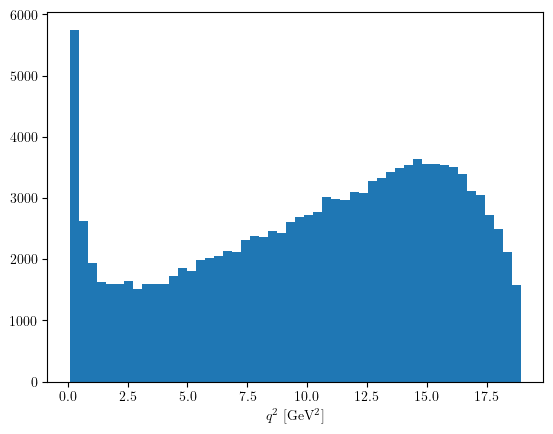

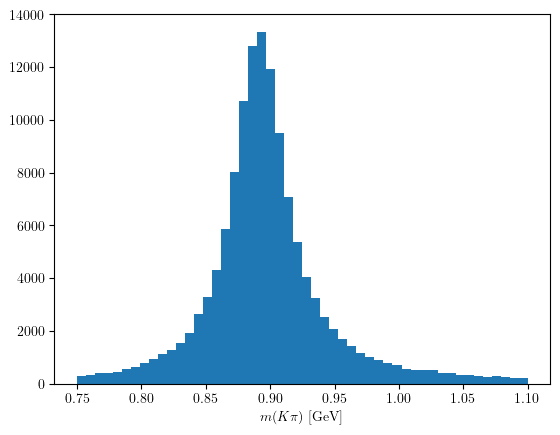

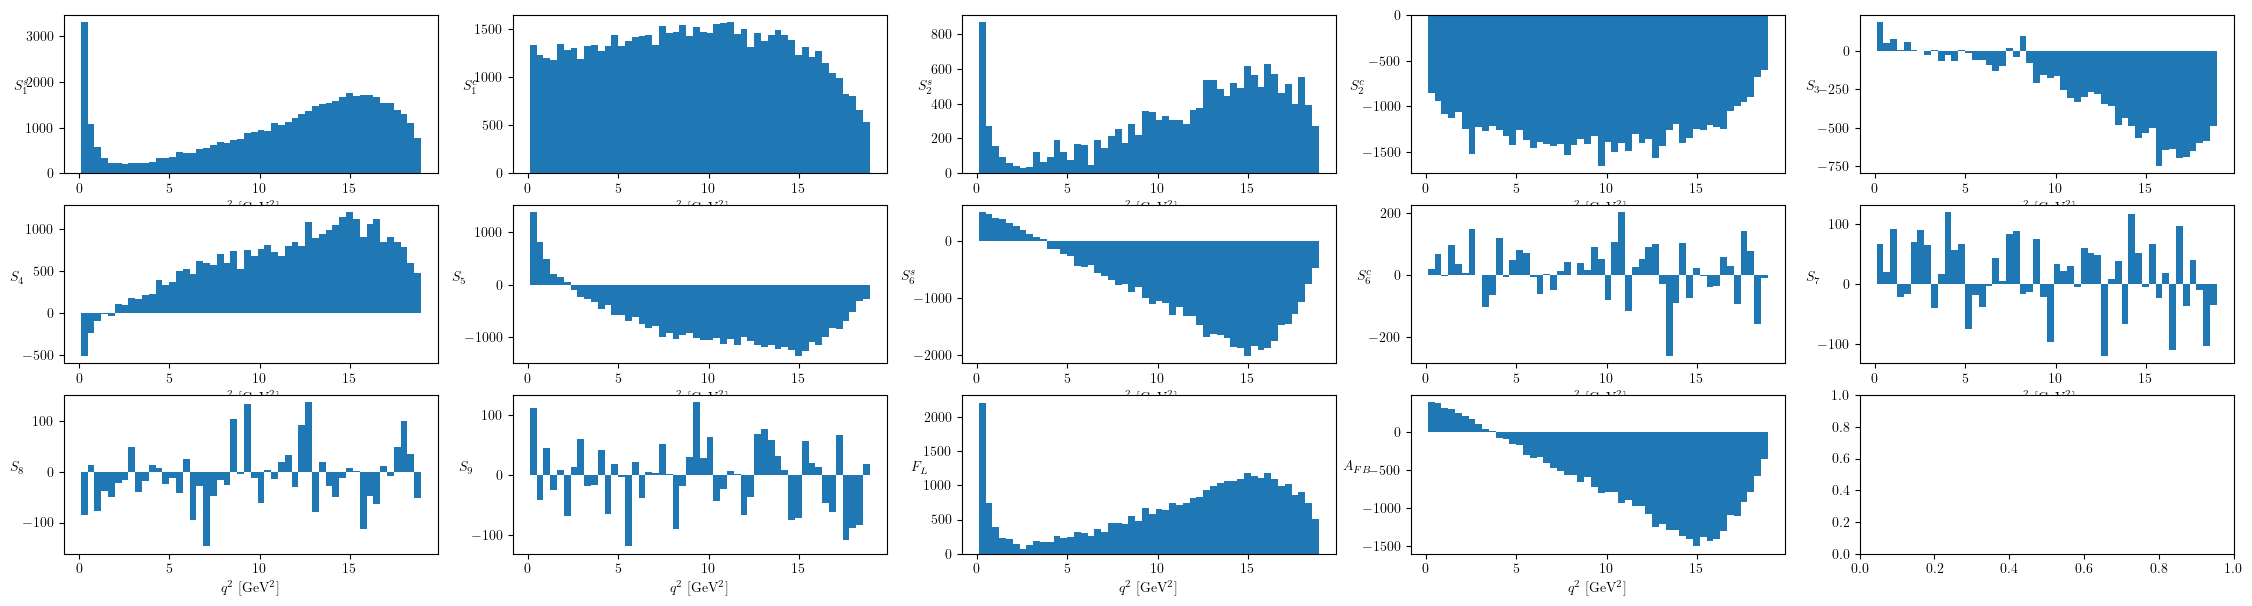

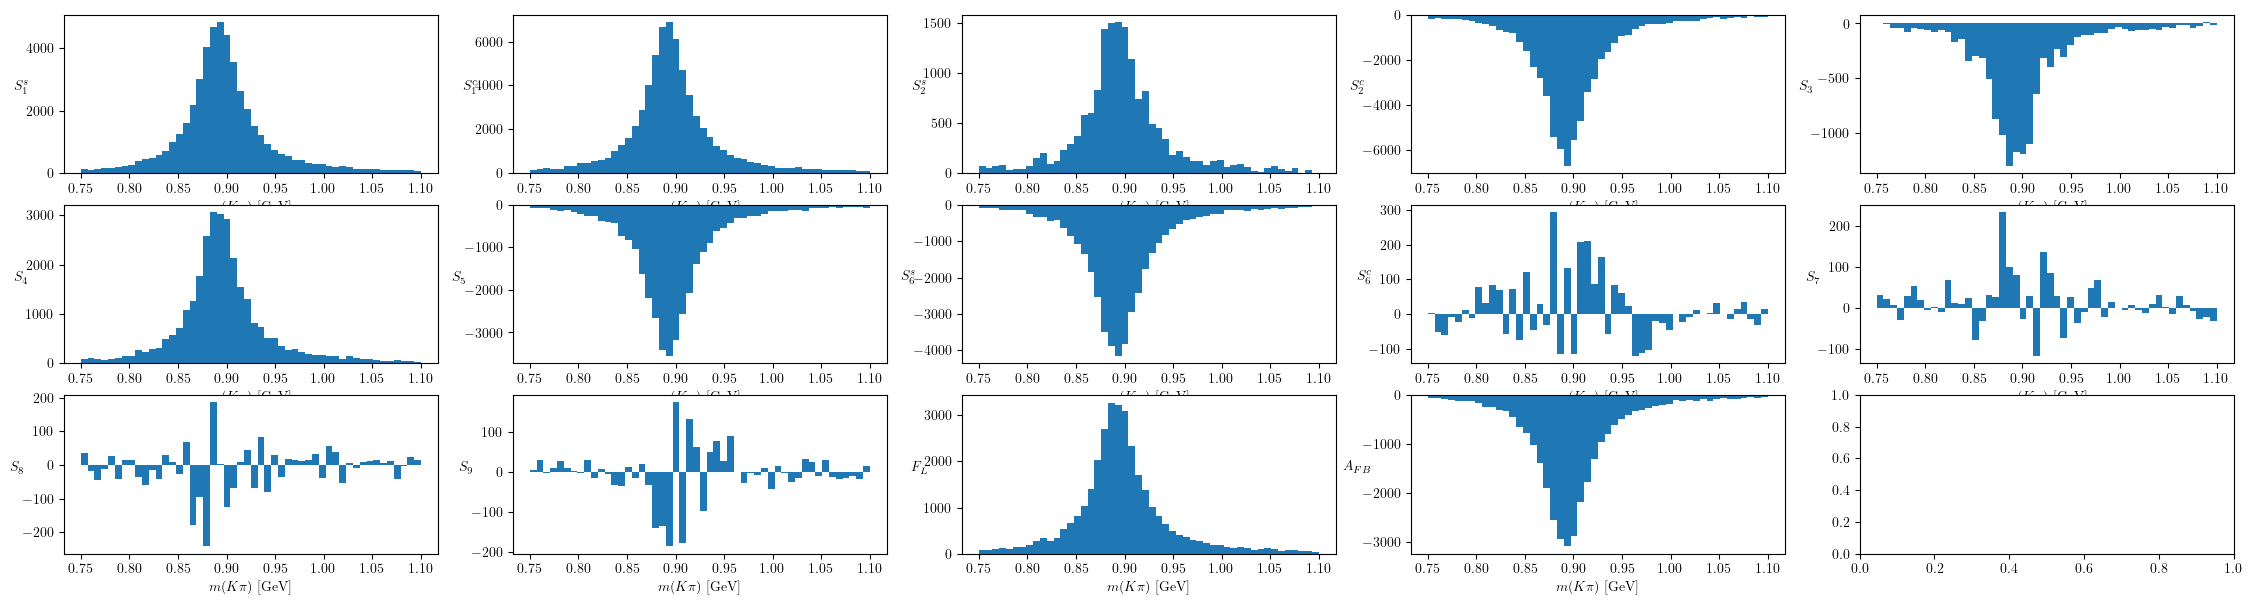

In [9]:
plt.figure()
r_bins = plt.hist(evts_SM['q2'], bins = 50)
plt.xlabel("$q^{2}$ [GeV$^{2}$]")

plt.figure()
r_bins_mkpi = plt.hist(evts_SM['mkpi'], bins = 50)
plt.xlabel(r"$m(K\pi)$ [GeV]")

mom_bins = {}
fig, ax = plt.subplots(nrows=3, ncols=5, figsize = (28,7))
_i = 0
for _row in ax:
    for _col in _row:
        if _i == len(obsList):
            break
        if obsList[_i] in evts_SM.columns:
            mom_bins[obsList[_i]] = _col.hist(evts_SM['q2'], weights = evts_SM['%s' % obsList[_i]], bins = 50)
        else:
            mom_bins[obsList[_i]] = _col.hist(evts_SM['q2'], weights = evts_SM['%s' % obsList[_i].replace('S','m')], bins = 50)
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1
        
mom_bins_mkpi = {}
fig, ax = plt.subplots(nrows=3, ncols=5, figsize = (28,7))
_i = 0
for _row in ax:
    for _col in _row:
        if _i == len(obsList):
            break
        if obsList[_i] in evts_SM.columns:
            mom_bins_mkpi[obsList[_i]] = _col.hist(evts_SM['mkpi'], weights = evts_SM['%s' % obsList[_i]], bins = 50)
        else:
            mom_bins_mkpi[obsList[_i]] = _col.hist(evts_SM['mkpi'], weights = evts_SM['%s' % obsList[_i].replace('S','m')], bins = 50)
        _col.set_xlabel(r"$m(K\pi)$ [GeV]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1
        

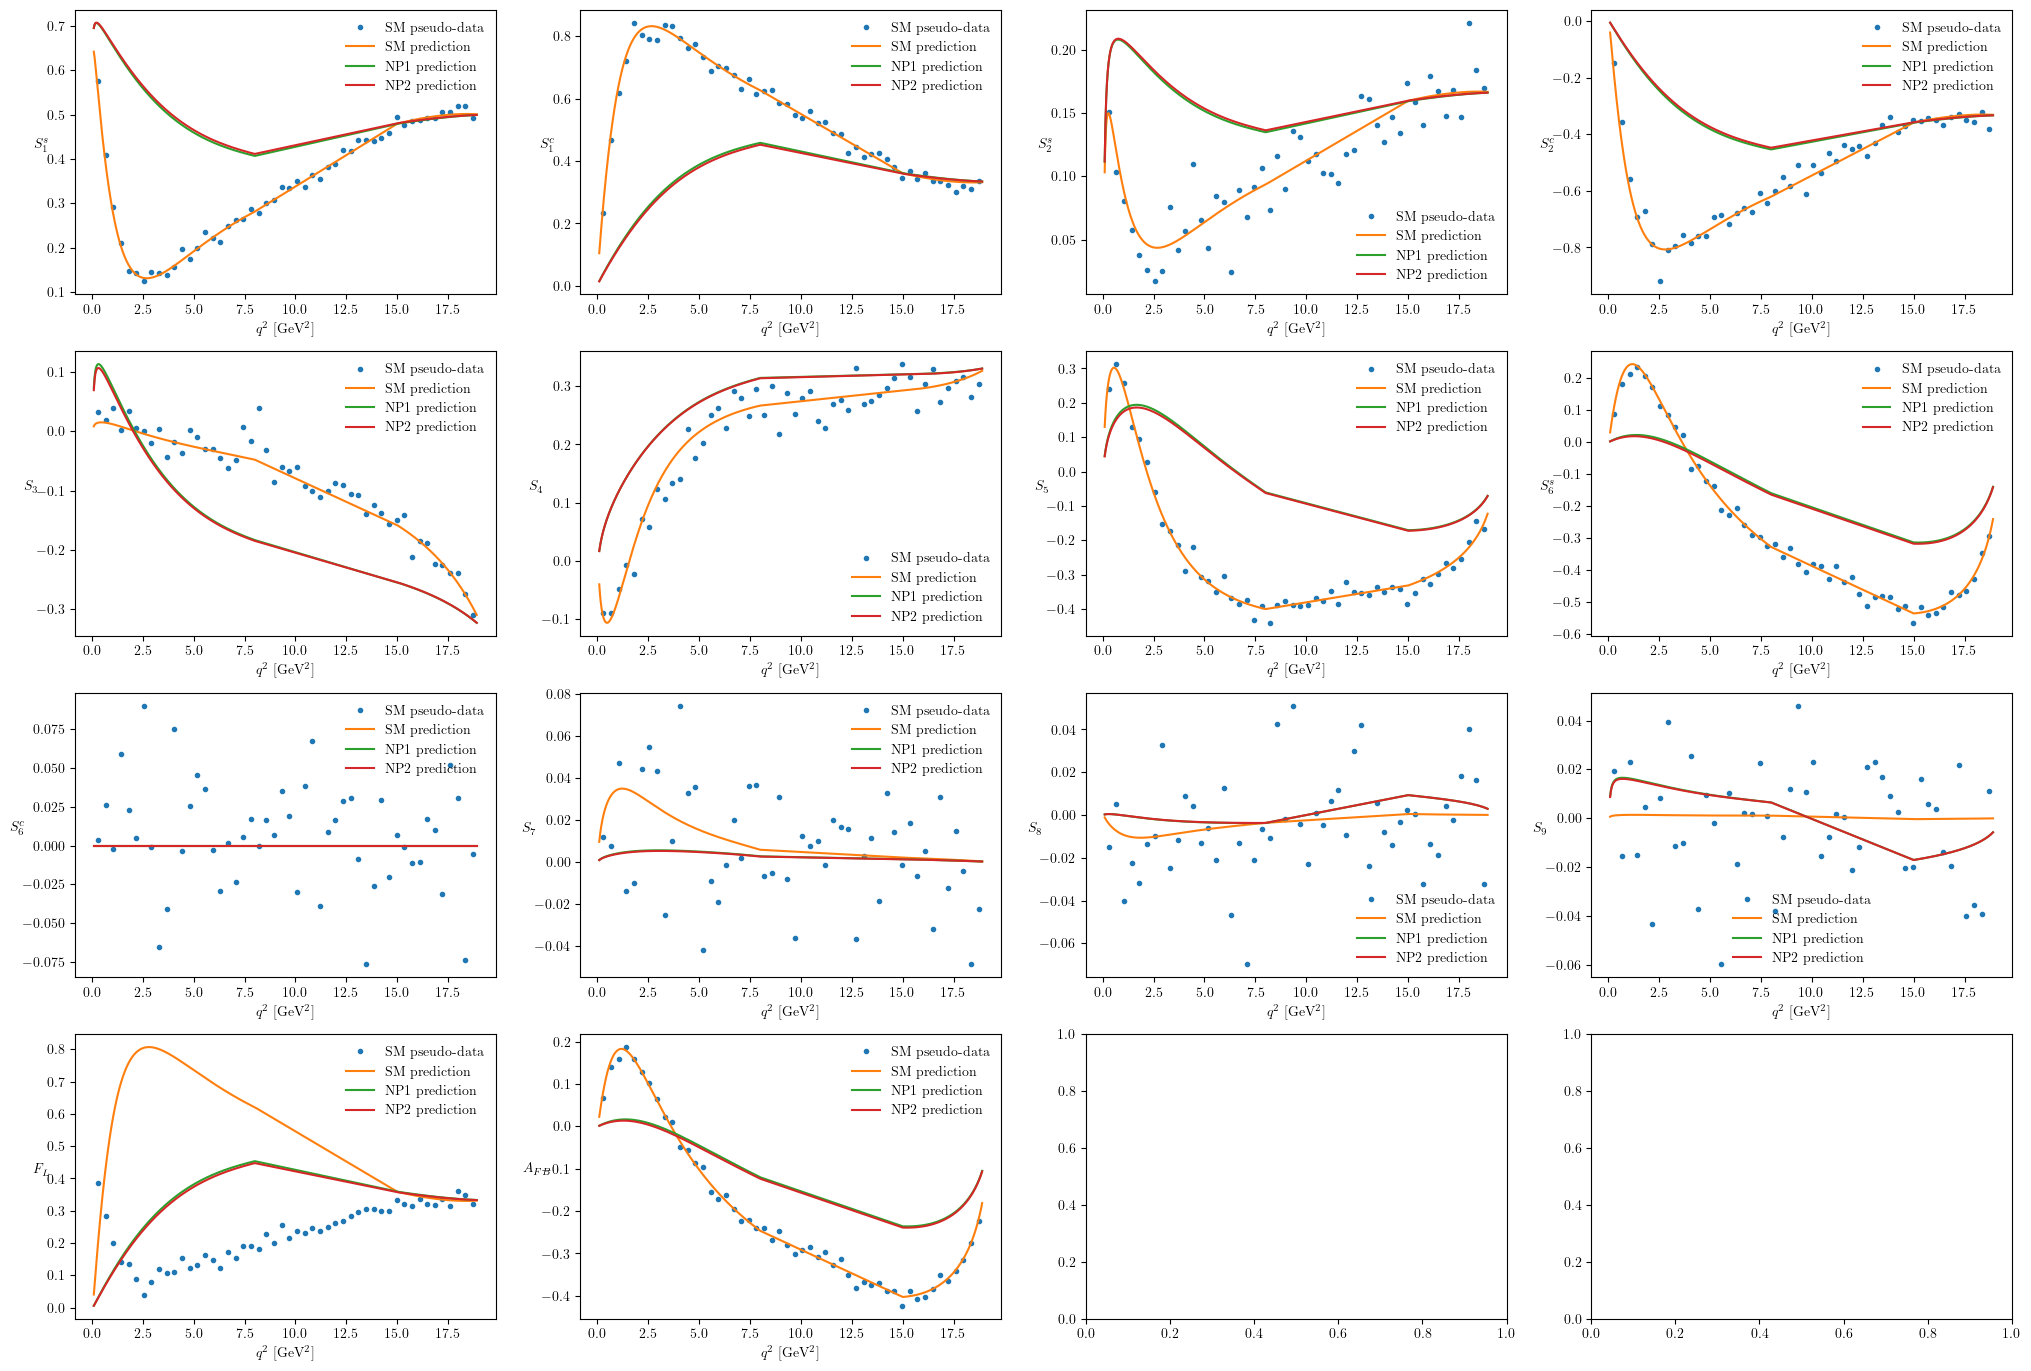

In [10]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (25,17))
q2range = mypdf_SM.getQ2Range()
nq2 = 1000
q2vals = np.linspace(q2range[0], q2range[1], nq2)
predVals_SM = {}
predVals_NP1 = {}
predVals_NP2 = {}
_i = 0
for _row in ax:
    for _col in _row:
        if _i == len(obsList):
            break
        pred_SM, conversion_SM = mypdf_SM.getPredictions(obsList[_i])
        predVals_SM[obsList[_i]] = conversion_SM*pred_SM(q2vals)
        pred_NP1, conversion_NP1 = mypdf_NP1.getPredictions(obsList[_i])
        predVals_NP1[obsList[_i]] = conversion_NP1*pred_NP1(q2vals)        
        pred_NP2, conversion_NP2 = mypdf_NP2.getPredictions(obsList[_i])
        predVals_NP2[obsList[_i]] = conversion_NP2*pred_NP2(q2vals)             
        _col.plot(r_bins[1][0:50]+0.2, mom_bins[obsList[_i]][0]/r_bins[0], '.', label = 'SM pseudo-data')
        _col.plot(q2vals, predVals_SM[obsList[_i]], label = 'SM prediction')
        _col.plot(q2vals, predVals_NP1[obsList[_i]], label = 'NP1 prediction')
        _col.plot(q2vals, predVals_NP2[obsList[_i]], label = 'NP2 prediction')
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _col.legend(frameon = False)
        _i += 1
        

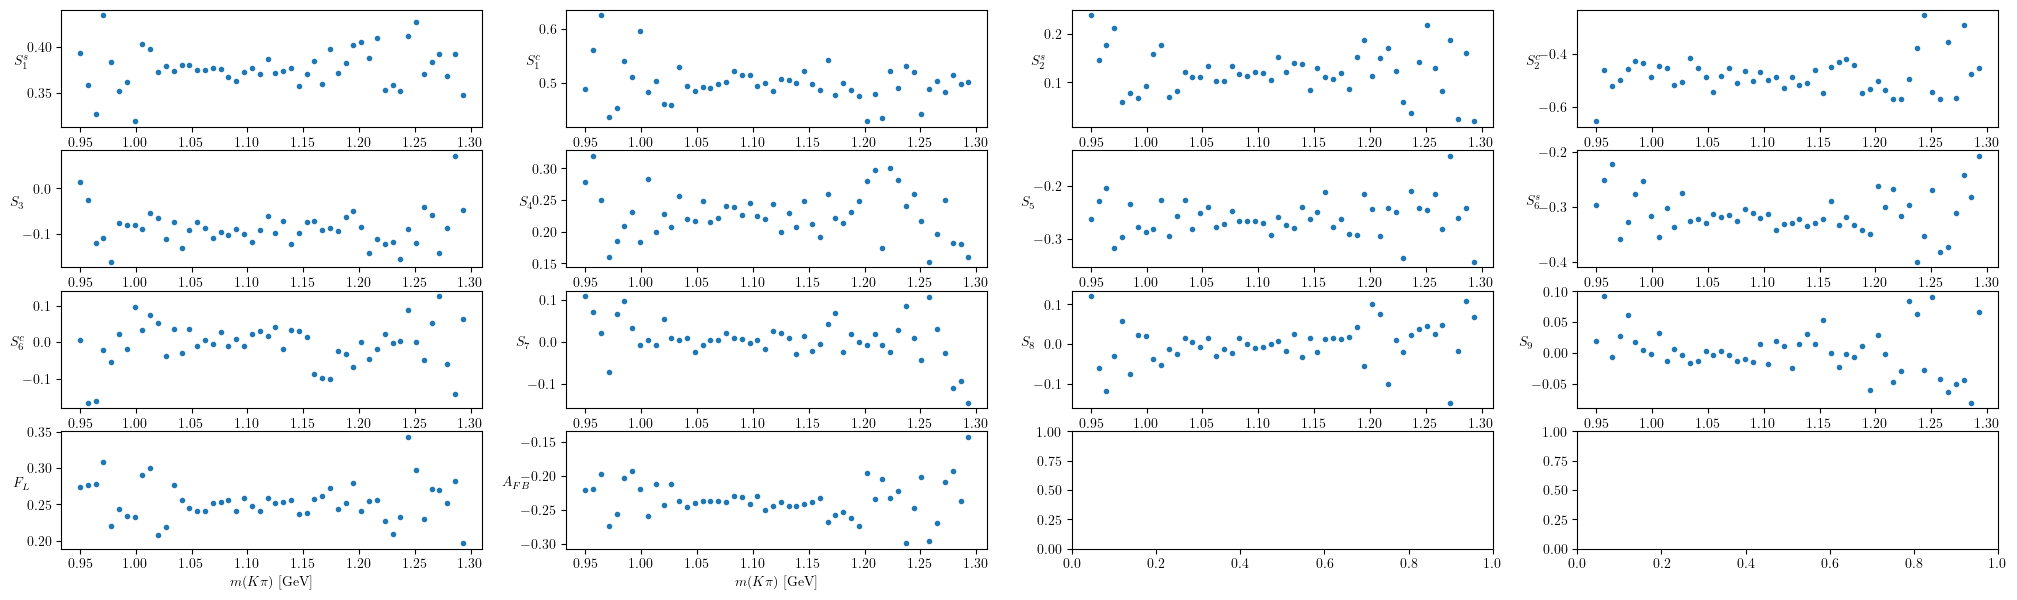

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        if _i == len(obsList):
            break
        _col.plot(r_bins_mkpi[1][0:50]+0.2, mom_bins_mkpi[obsList[_i]][0]/r_bins_mkpi[0], '.')
        _col.set_xlabel(r"$m(K\pi)$ [GeV]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF
from sklearn import neighbors
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d 

In [15]:
n_neighbours = 1000
knn = neighbors.KNeighborsRegressor(n_neighbours, weights="uniform", algorithm="kd_tree", n_jobs=8, leaf_size = 1000, p = 2)
T = np.linspace(q2range[0],q2range[1],nq2)[:, np.newaxis]
unbins_SM = {}
unbins_NP1 = {}
unbins_NP2 = {}

In [8]:
nvariants = 200
#import importlib
#importlib.reload(moments)
import moments
for _s in range(nvariants):
    print(f"INFO: Processing variation {_s}")
    unbins[_s] = {}
    tsample = evts.sample(datasize, replace = True)
    reshaped_q2 = np.array(tsample['q2']).reshape(datasize,1)
    for _obs in momentsList:
        obsample = tsample['%s' % _obs]
        tempFit = knn.fit(reshaped_q2, obsample)
        unbins[_s][_obs] = tempFit.predict(T)

INFO: Processing variation 0
INFO: Processing variation 1
INFO: Processing variation 2
INFO: Processing variation 3
INFO: Processing variation 4
INFO: Processing variation 5
INFO: Processing variation 6
INFO: Processing variation 7
INFO: Processing variation 8
INFO: Processing variation 9
INFO: Processing variation 10
INFO: Processing variation 11
INFO: Processing variation 12
INFO: Processing variation 13
INFO: Processing variation 14
INFO: Processing variation 15
INFO: Processing variation 16
INFO: Processing variation 17
INFO: Processing variation 18
INFO: Processing variation 19
INFO: Processing variation 20
INFO: Processing variation 21
INFO: Processing variation 22
INFO: Processing variation 23
INFO: Processing variation 24
INFO: Processing variation 25
INFO: Processing variation 26
INFO: Processing variation 27
INFO: Processing variation 28
INFO: Processing variation 29
INFO: Processing variation 30
INFO: Processing variation 31
INFO: Processing variation 32
INFO: Processing var

In [16]:
# Make a note of the nominal
smear_power = 10
import itertools
unbins_SM[-1] = {}
unbins_NP1[-1] = {}
unbins_NP2[-1] = {}
for _obs in obsList:
    tempFit = knn.fit(np.array(evts_SM["q2"]).reshape(datasize,1), evts_SM[_obs])
    unbins_SM[-1][_obs] = tempFit.predict(T)
    tempFit = knn.fit(np.array(evts_SM["q2"]).reshape(datasize,1), evts_SM[f'{_obs}_{_obs}'])
    unbins_SM[-1][f'var_{_obs}'] = tempFit.predict(T)
    
    tempFit = knn.fit(np.array(evts_NP1["q2"]).reshape(datasize,1), evts_NP1[_obs])
    unbins_NP1[-1][_obs] = tempFit.predict(T)
    tempFit = knn.fit(np.array(evts_NP1["q2"]).reshape(datasize,1), evts_NP1[f'{_obs}_{_obs}'])
    unbins_NP1[-1][f'var_{_obs}'] = tempFit.predict(T)
    
    tempFit = knn.fit(np.array(evts_NP2["q2"]).reshape(datasize,1), evts_NP2[_obs])
    unbins_NP2[-1][_obs] = tempFit.predict(T)
    tempFit = knn.fit(np.array(evts_NP2["q2"]).reshape(datasize,1), evts_NP2[f'{_obs}_{_obs}'])
    unbins_NP2[-1][f'var_{_obs}'] = tempFit.predict(T)

for _p in itertools.combinations_with_replacement(obsList,2):
    tempFit = knn.fit(np.array(evts_SM["q2"]).reshape(datasize,1), evts_SM['{_a}_{_b}'.format(_a = _p[0], _b = _p[1])])
    unbins_SM[-1]['var_{_a}_{_b}'.format(_a = _p[0], _b = _p[1])] = tempFit.predict(T)
    
    tempFit = knn.fit(np.array(evts_NP1["q2"]).reshape(datasize,1), evts_NP1['{_a}_{_b}'.format(_a = _p[0], _b = _p[1])])
    unbins_NP1[-1]['var_{_a}_{_b}'.format(_a = _p[0], _b = _p[1])] = tempFit.predict(T)

    tempFit = knn.fit(np.array(evts_NP2["q2"]).reshape(datasize,1), evts_NP2['{_a}_{_b}'.format(_a = _p[0], _b = _p[1])])
    unbins_NP2[-1]['var_{_a}_{_b}'.format(_a = _p[0], _b = _p[1])] = tempFit.predict(T)

In [17]:
import moments
smear_power = 10
#importlib.reload(moments)
#for _s in range(nvariants):
#    unbins[_s] = moments.calculateDerivedObs(unbins[_s], False)
#    unbins[_s] = pd.DataFrame(unbins[_s])
smoothed_SM = unbins_SM[-1]
smoothed_NP1 = unbins_NP1[-1]
smoothed_NP2 = unbins_NP2[-1]
for _o in obsList:
    smoothed_SM[_o] = gaussian_filter1d(unbins_SM[-1][_o], sigma = smear_power)
    smoothed_NP1[_o] = gaussian_filter1d(unbins_NP1[-1][_o], sigma = smear_power)
    smoothed_NP2[_o] = gaussian_filter1d(unbins_NP2[-1][_o], sigma = smear_power)
    
unbins_SM[-1] = moments.calculateDerivedObs(smoothed_SM, unbins_SM[-1])
unbins_SM[-1] = pd.DataFrame(unbins_SM[-1])
unbins_NP1[-1] = moments.calculateDerivedObs(smoothed_NP1, unbins_NP1[-1])
unbins_NP1[-1] = pd.DataFrame(unbins_NP1[-1])
unbins_NP2[-1] = moments.calculateDerivedObs(smoothed_NP2, unbins_NP2[-1])
unbins_NP2[-1] = pd.DataFrame(unbins_NP2[-1])

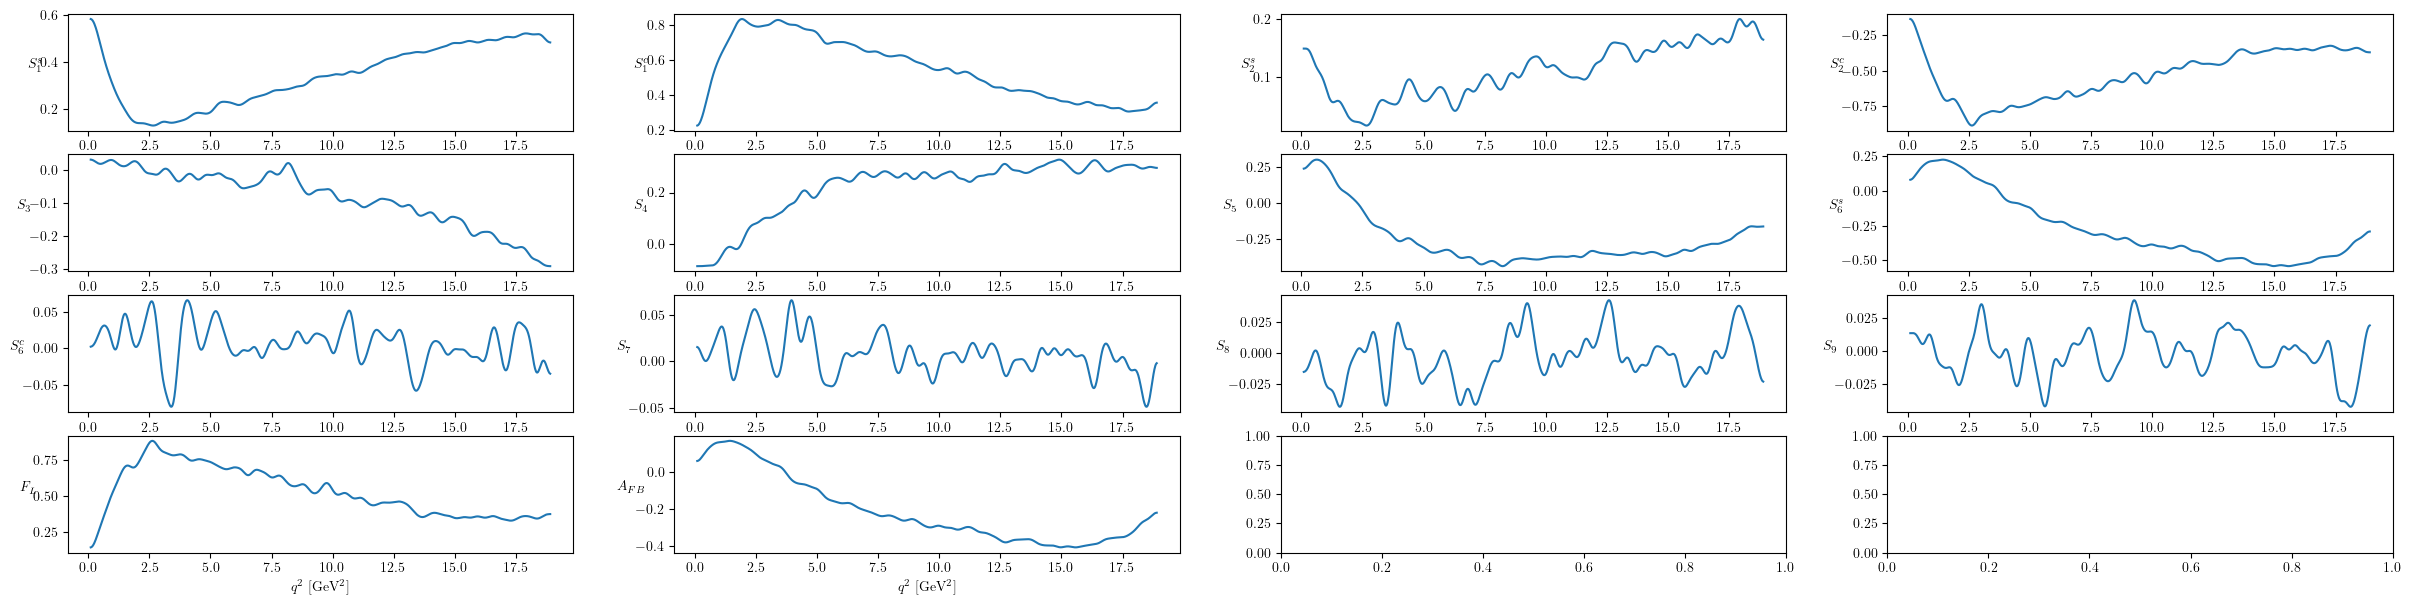

In [18]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (30,7))
_i = 0
for _row in ax:
    for _col in _row:
        if _i == len(obsList):
            continue
        _col.plot(T, unbins_SM[-1][obsList[_i]])
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

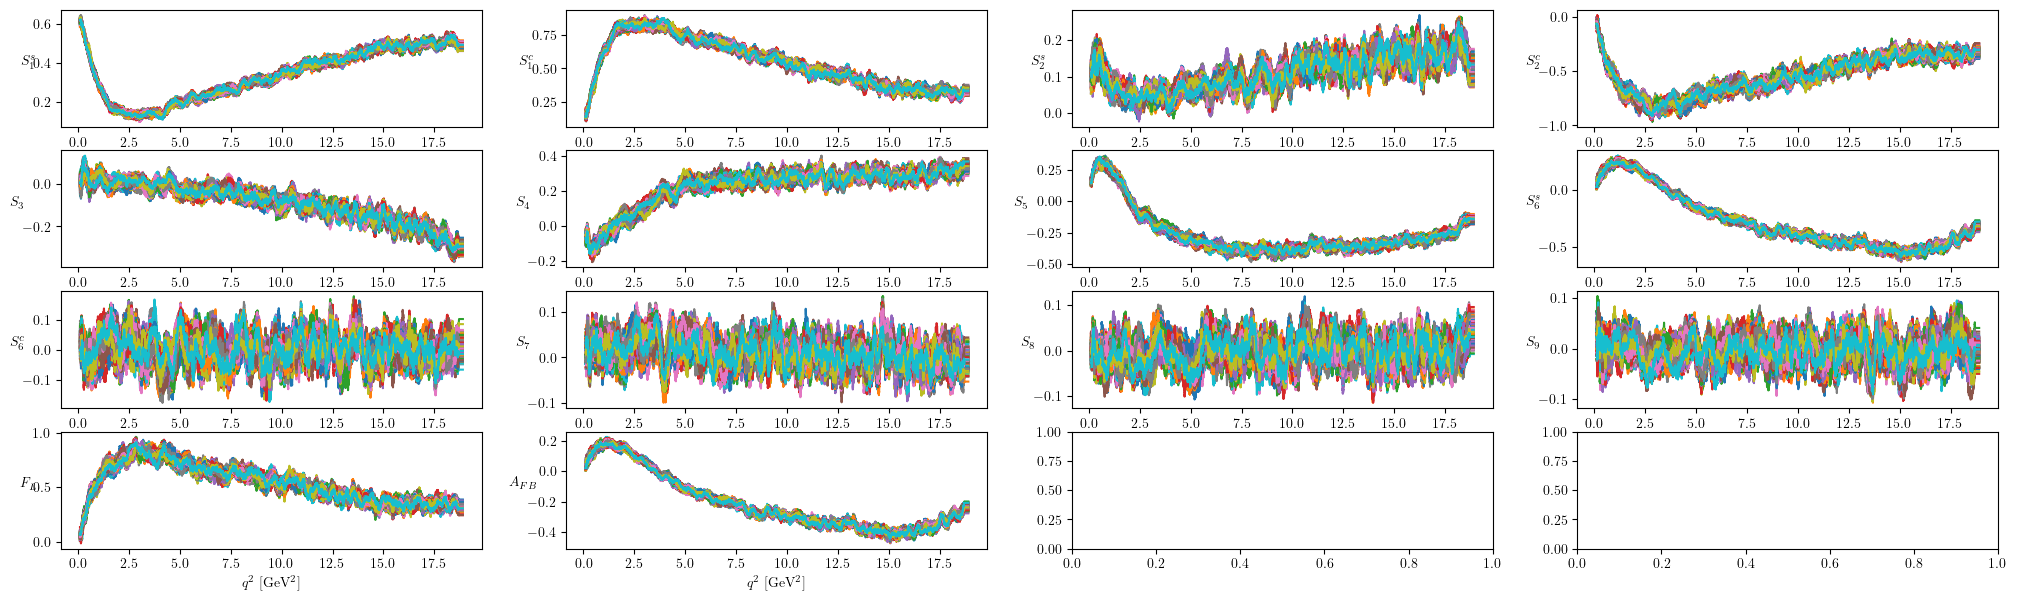

In [12]:
filtered_unbins = {}
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        if _i == len(obsList):
            break
        _obs = obsList[_i]
        filtered_unbins[_obs] = {}
        for _s in range(nvariants):
            filtered_unbins[_obs][_s] = gaussian_filter1d(unbins[_s][_obs], sigma=smear_power)
            _col.plot(T, unbins[_s][_obs])
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

In [20]:
mean_vals = {}
lower_vals = {}
upper_vals = {}
sigma_vals = {}
for _obs in totalObsList:
    mean_vals[_obs] = []
    lower_vals[_obs] = []
    upper_vals[_obs] = []
    sigma_vals[_obs] = []
for _v in range(nq2):
    for _obs in totalObsList:
        if _obs in ['M1s', 'M1c', 'M2s', 'M2c','M6s', 'M6c']:
            continue
        ordered = [unbins[_s][_obs][_v] for _s in range(nvariants)]
        ordered.sort()
        ordered = np.array(ordered)
        ordered = np.nan_to_num(ordered, 100)
        ordered = np.clip(ordered, -10, 10)
        mean_vals[_obs].append(np.mean(ordered))
        lower_vals[_obs].append(ordered[32])
        upper_vals[_obs].append(ordered[168])
        sigma_vals[_obs].append(0.5*abs(upper_vals[_obs][-1] - lower_vals[_obs][-1]))

NameError: name 'nvariants' is not defined

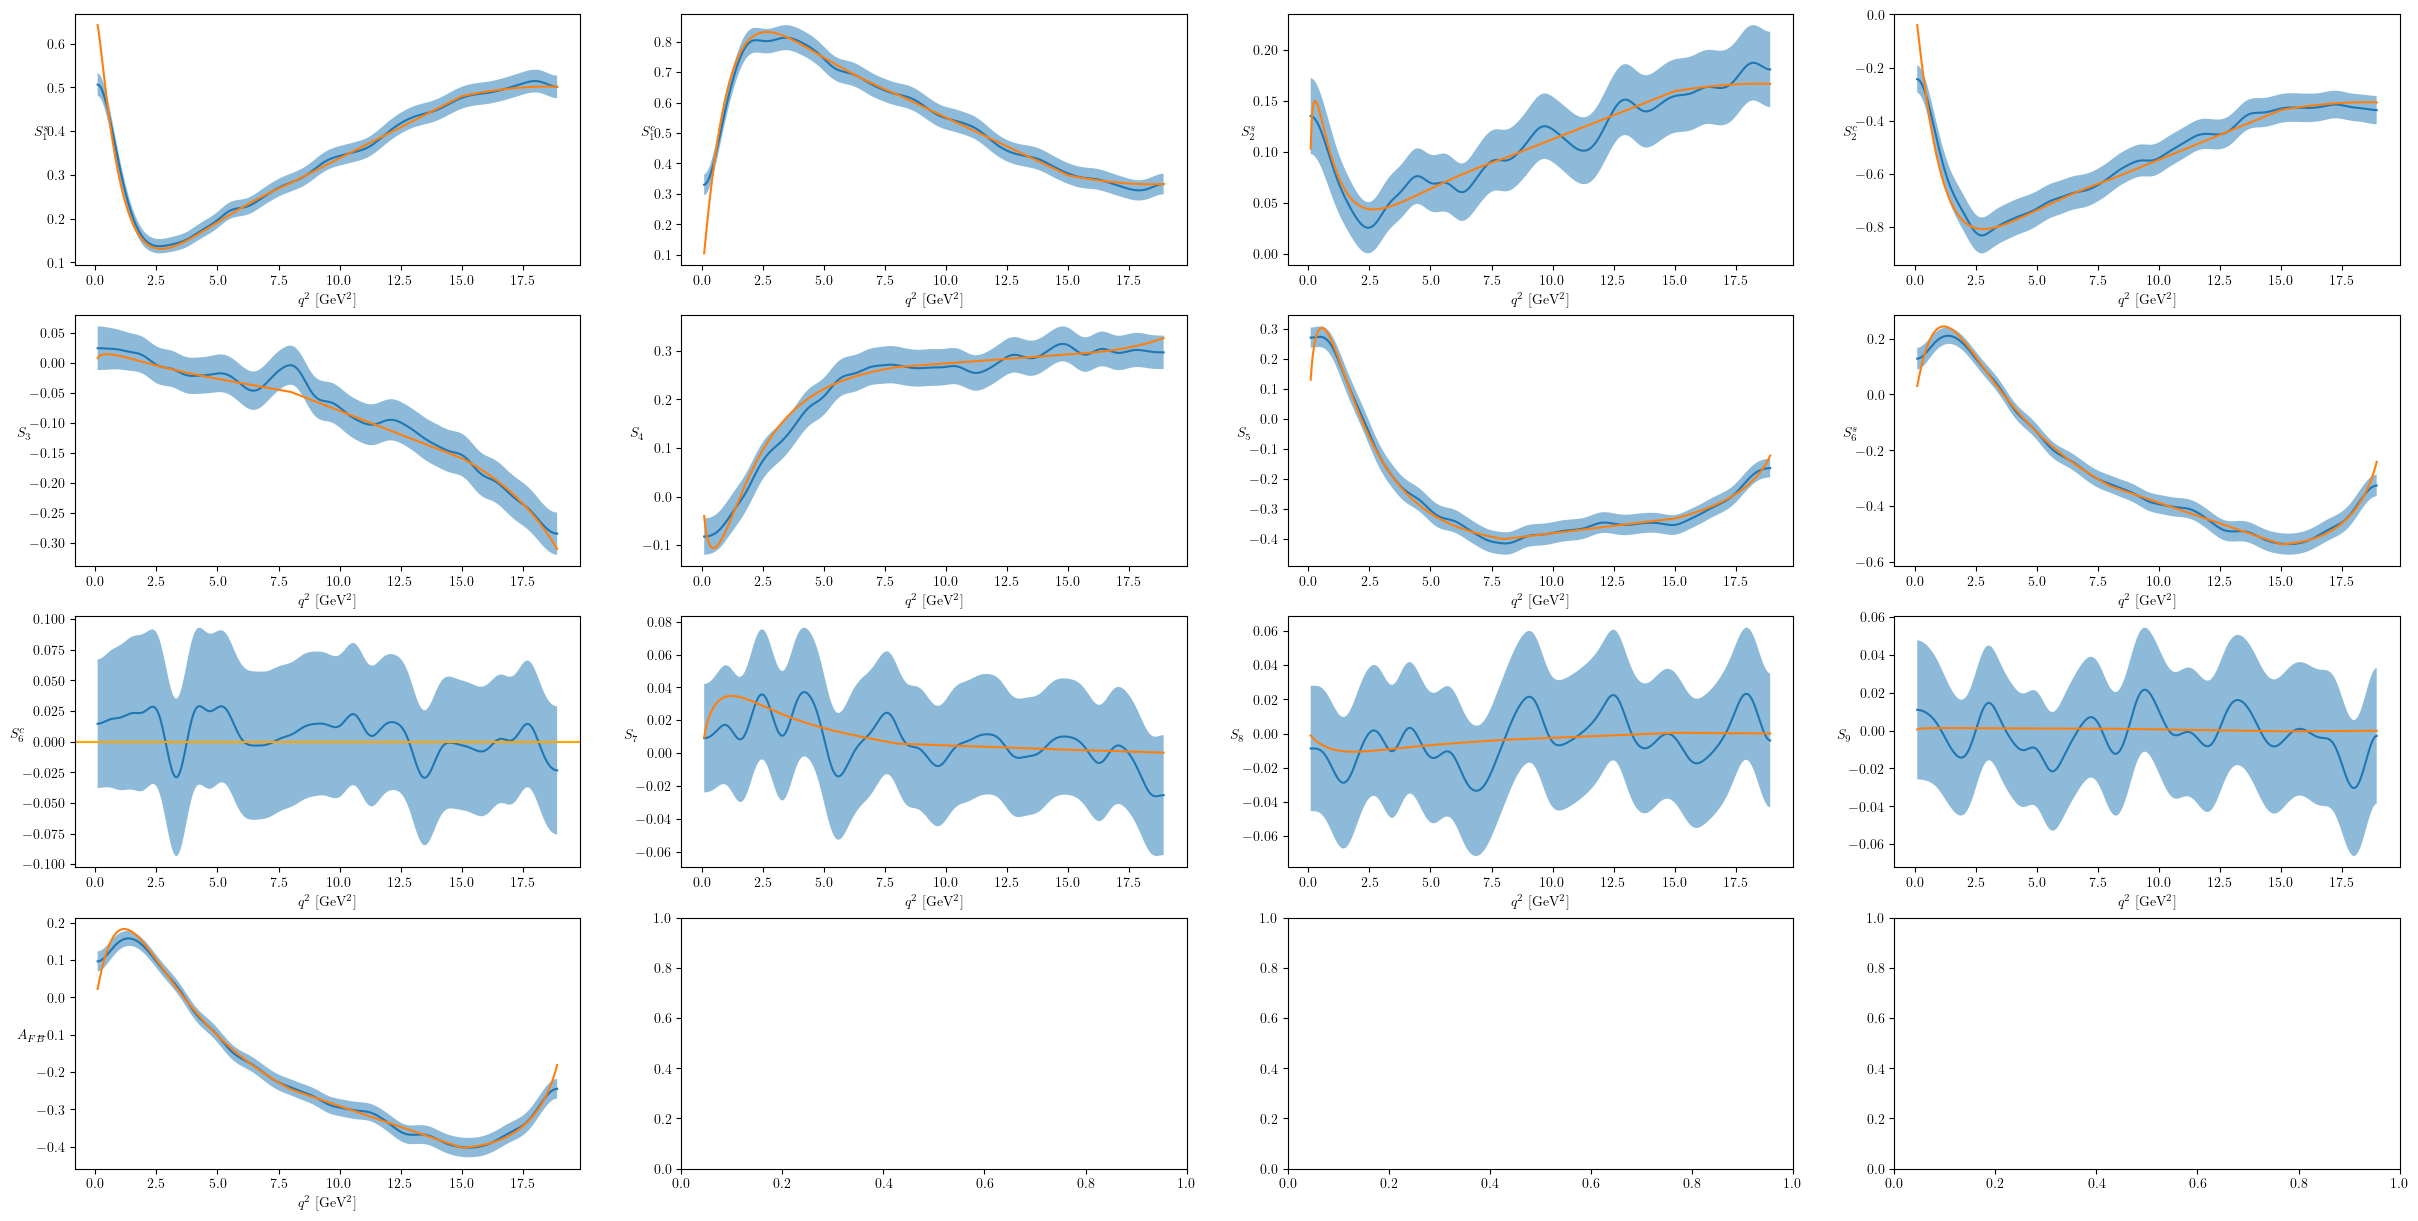

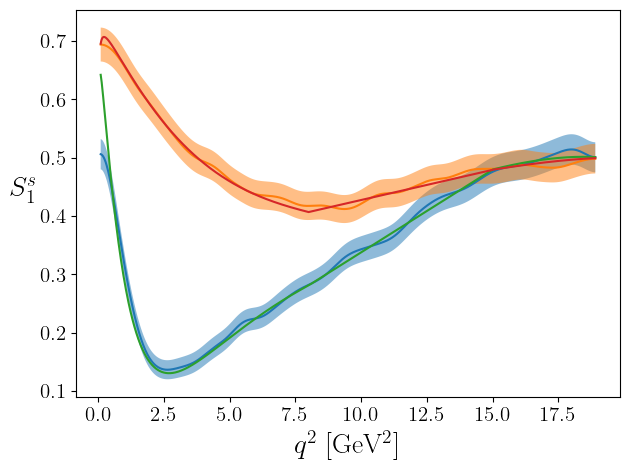

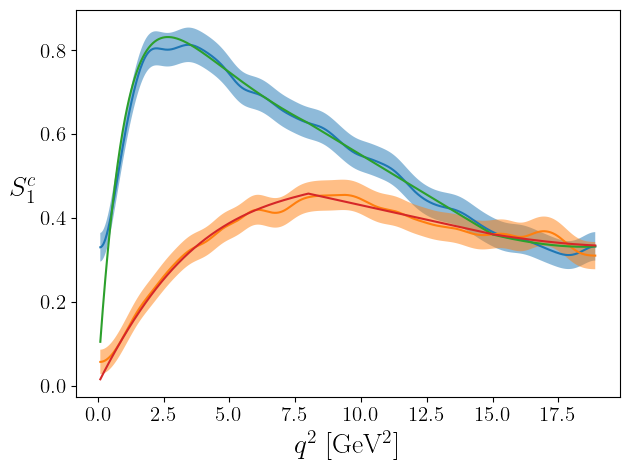

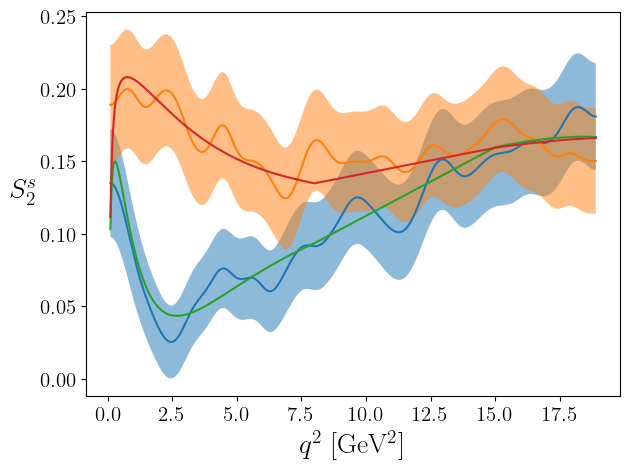

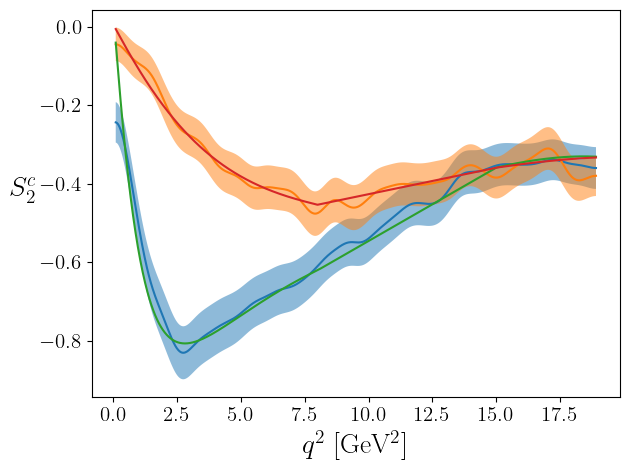

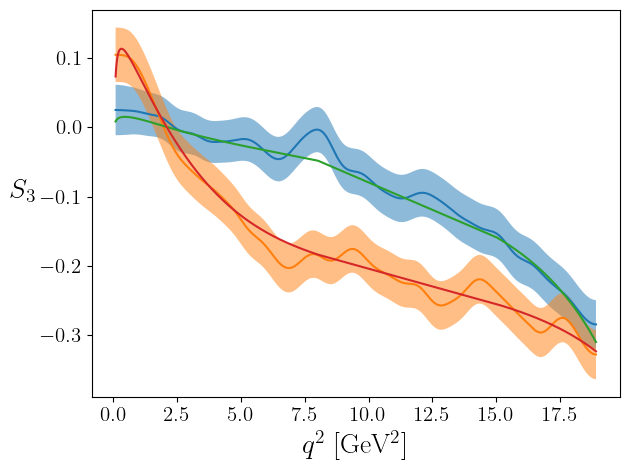

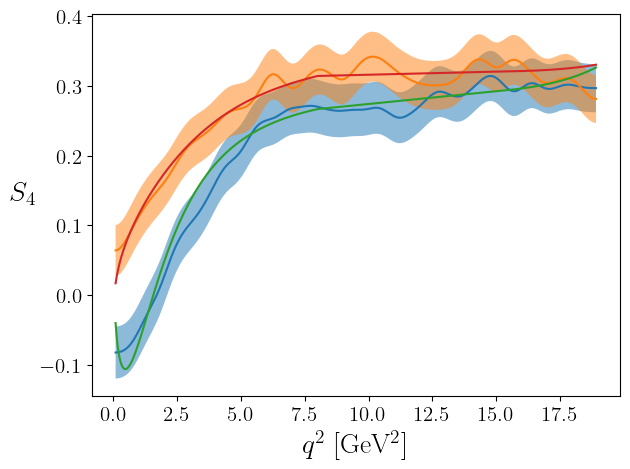

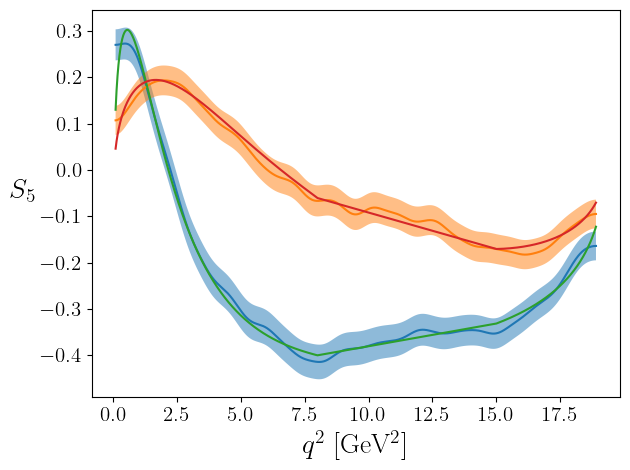

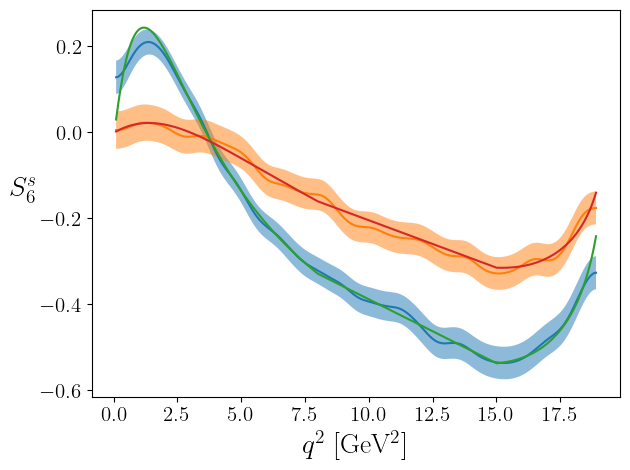

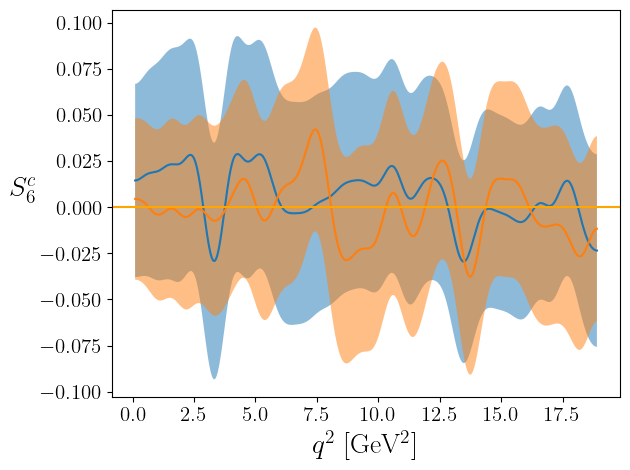

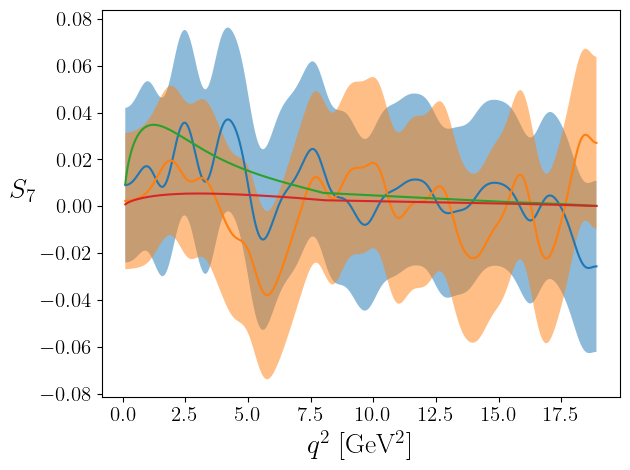

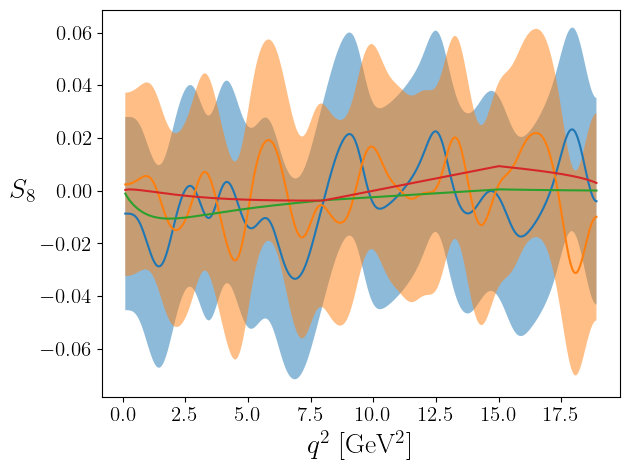

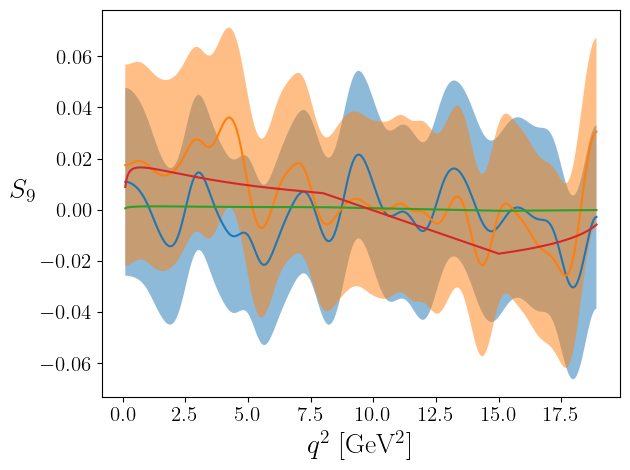

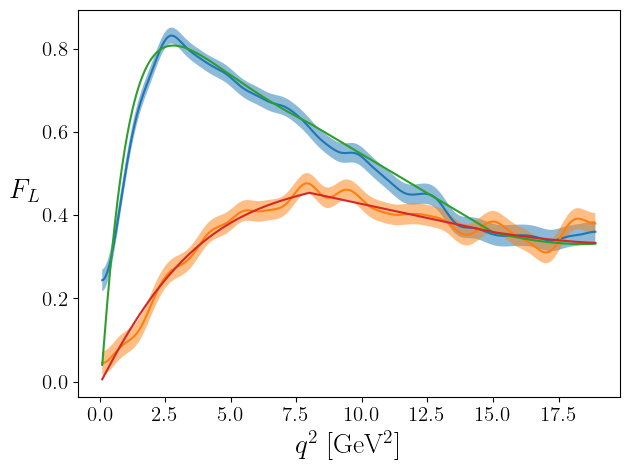

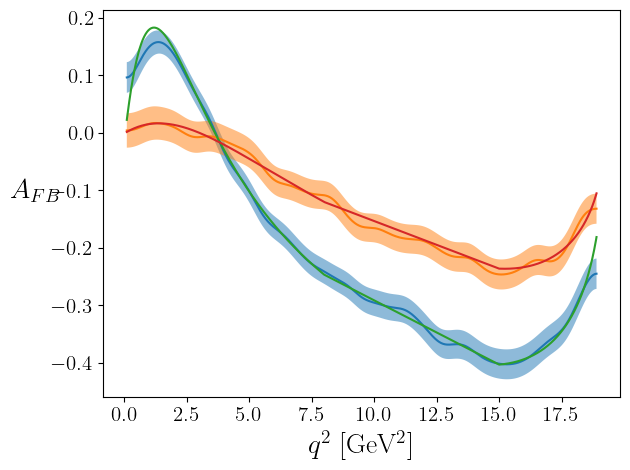

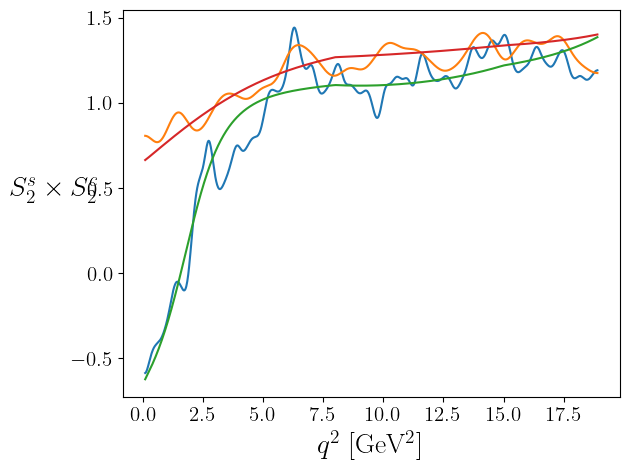

In [19]:
# Plot the Si basis observables with uncertainties from bootstrapping
smear_power = 20
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (30,15))
_i = 0
for _row in ax:
    for _col in _row:
        if _i == len(obsList):
            break
        _obs = obsList[_i]
        while _obs in ['M1s', 'M1c', 'M2s', 'M2c','M6s', 'M6c', 'FL']:
            _i += 1
            if _i == len(obsList):
                break
            _obs = obsList[_i]
        _col.plot(T, gaussian_filter1d(unbins_SM[-1][_obs], sigma = smear_power))
        _col.fill_between(T.reshape(nq2), gaussian_filter1d(unbins_SM[-1][_obs] - np.sqrt(unbins_SM[-1][f'var_{_obs}']/(n_neighbours-1)), sigma = smear_power),
                                          gaussian_filter1d(unbins_SM[-1][_obs] + np.sqrt(unbins_SM[-1][f'var_{_obs}']/(n_neighbours - 1)), sigma = smear_power), alpha = 0.5)
        #_col.plot(T, gaussian_filter1d(unbins[-1][_obs], sigma=smear_power))
        #_col.fill_between(T.reshape(nq2), gaussian_filter1d(lower_vals[_obs], sigma=smear_power), gaussian_filter1d(upper_vals[_obs], sigma=smear_power), alpha = 0.5)
        #_col.fill_between(T.reshape(nq2), gaussian_filter1d(unbins[-1][_obs] - np.sqrt(unbins[-1][f'var_{_obs}']/(n_neighbours-1)), sigma=smear_power),
        #                                  gaussian_filter1d(unbins[-1][_obs] + np.sqrt(unbins[-1][f'var_{_obs}']/(n_neighbours - 1)), sigma=smear_power), alpha = 0.5)
        if _obs == 'AFB':
            _col.plot(q2vals, 0.75*predVals_SM["S6s"])
        elif _obs not in ["S6c"]:
            _col.plot(q2vals, predVals_SM[_obs])
        elif _obs == "S6c":
            _col.axhline(0, color='orange')
        #_col.axvline(1.020**2, color="green", linestyle="dotted")
        #_col.axvline(1.1, color="green", linestyle="dotted")
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1
pp = PdfPages('si_observables.pdf')
for _o in obsList:
    plt.figure()
    plt.plot(T, gaussian_filter1d(unbins_SM[-1][_o], sigma = smear_power))
    plt.fill_between(T.reshape(nq2), gaussian_filter1d(unbins_SM[-1][_o] - np.sqrt(unbins_SM[-1][f'var_{_o}']/(n_neighbours-1)), sigma = smear_power),
                                      gaussian_filter1d(unbins_SM[-1][_o] + np.sqrt(unbins_SM[-1][f'var_{_o}']/(n_neighbours - 1)), sigma = smear_power), alpha = 0.5)
    plt.plot(T, gaussian_filter1d(unbins_NP1[-1][_o], sigma = smear_power))
    plt.fill_between(T.reshape(nq2), gaussian_filter1d(unbins_NP1[-1][_o] - np.sqrt(unbins_NP1[-1][f'var_{_o}']/(n_neighbours-1)), sigma = smear_power),
                                      gaussian_filter1d(unbins_NP1[-1][_o] + np.sqrt(unbins_NP1[-1][f'var_{_o}']/(n_neighbours - 1)), sigma = smear_power), alpha = 0.5)    
    if _o == 'AFB':
        plt.plot(q2vals, 0.75*predVals_SM["S6s"])
        plt.plot(q2vals, 0.75*predVals_NP1["S6s"])
    elif _o not in ["S6c"]:
        plt.plot(q2vals, predVals_SM[_o])
        plt.plot(q2vals, predVals_NP1[_o])
    elif _o == "S6c":
        plt.axhline(0, color='orange')
        #_col.axvline(1.020**2, color="green", linestyle="dotted")
        #_col.axvline(1.1, color="green", linestyle="dotted")
    plt.xlabel("$q^{2}$ [GeV$^{2}$]", rotation = 0, fontsize = 20)
    plt.ylabel(obs_to_label[_o], rotation = 0, fontsize = 20, labelpad = 12)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    pp.savefig()
    
plt.figure()
plt.plot(T, unbins_SM[-1]["S4"] / np.sqrt(-1.*unbins_SM[-1]["S2s"] * unbins_SM[-1]["S2c"]))
#plt.fill_between(T.reshape(nq2), gaussian_filter1d(unbins_SM[-1][_o] - np.sqrt(unbins_SM[-1][f'var_{_o}']/(n_neighbours-1)), sigma = smear_power),
#                                      gaussian_filter1d(unbins_SM[-1][_o] + np.sqrt(unbins_SM[-1][f'var_{_o}']/(n_neighbours - 1)), sigma = smear_power), alpha = 0.5)
plt.plot(T[(unbins_NP1[-1]["P4p"] < 10)], gaussian_filter1d(unbins_NP1[-1]["P4p"][(unbins_NP1[-1]["P4p"] < 10)], sigma = smear_power))# / np.sqrt(-1.*unbins_NP1[-1]["S2s"] * unbins_NP1[-1]["S2c"]))
#plt.fill_between(T.reshape(nq2), gaussian_filter1d(unbins_NP1[-1][_o] - np.sqrt(unbins_NP1[-1][f'var_{_o}']/(n_neighbours-1)), sigma = smear_power),
#                                      gaussian_filter1d(unbins_NP1[-1][_o] + np.sqrt(unbins_NP1[-1][f'var_{_o}']/(n_neighbours - 1)), sigma = smear_power), alpha = 0.5)    
plt.plot(q2vals, predVals_SM["S4"] / np.sqrt(-1.*predVals_SM["S2s"]*predVals_SM["S2c"]))
plt.plot(q2vals, predVals_NP1["S4"] / np.sqrt(-1.*predVals_NP1["S2s"]*predVals_NP1["S2c"]))

plt.xlabel("$q^{2}$ [GeV$^{2}$]", rotation = 0, fontsize = 20)
plt.ylabel(r"$S_{2}^{s} \times S_{2}^{c}$", rotation = 0, fontsize = 20, labelpad = 12)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
pp.savefig()
    
pp.close()

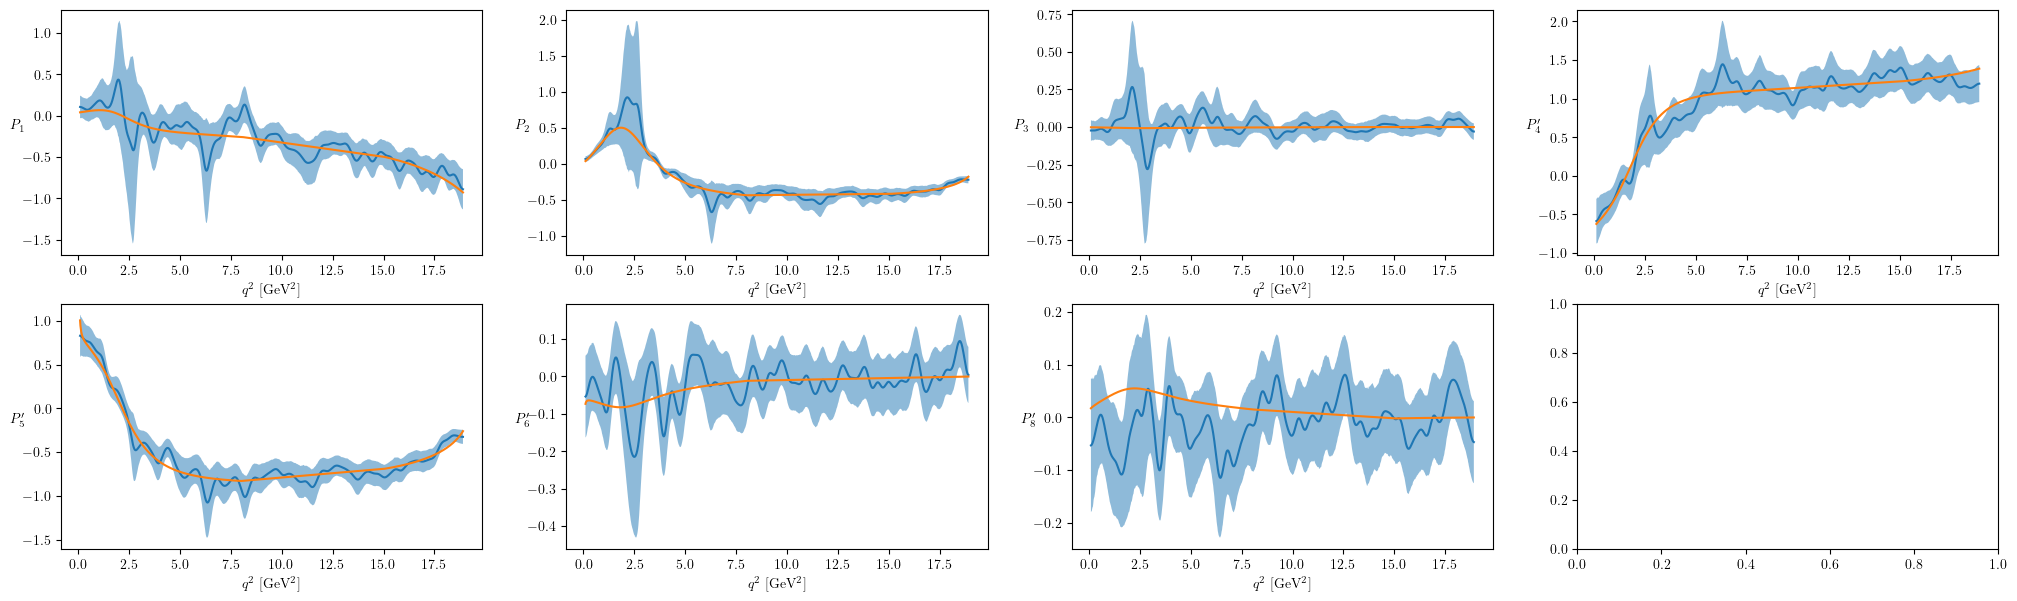

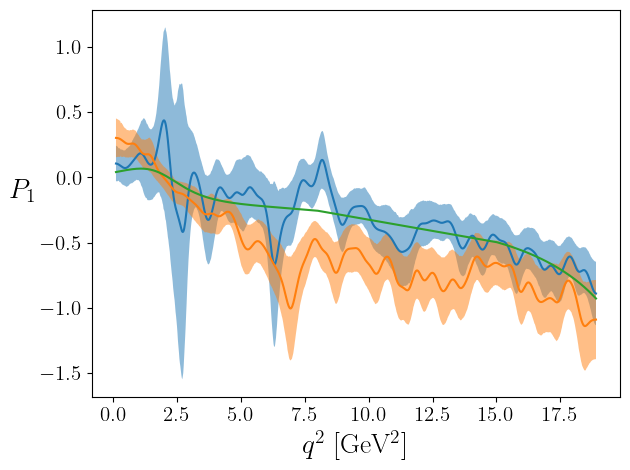

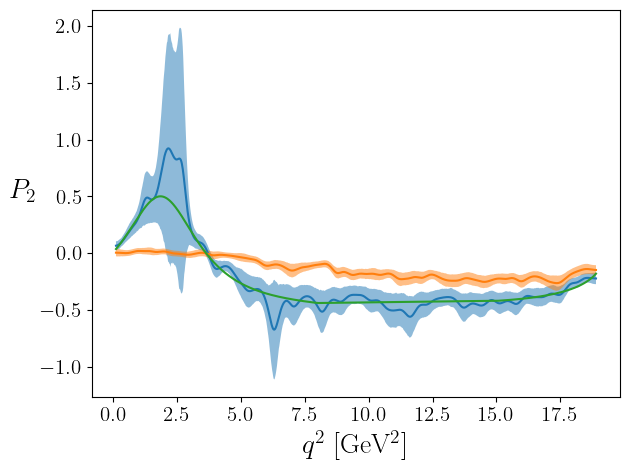

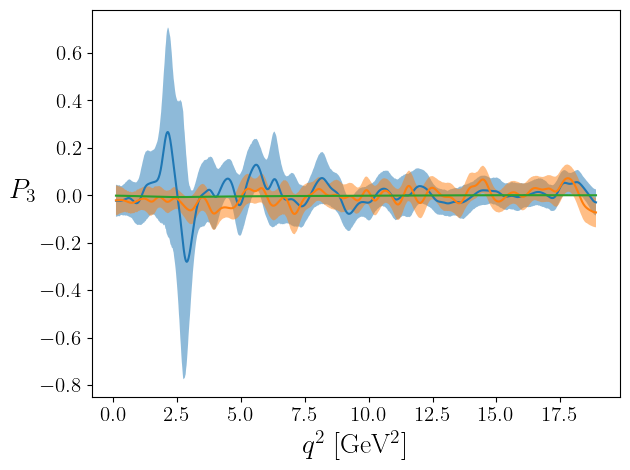

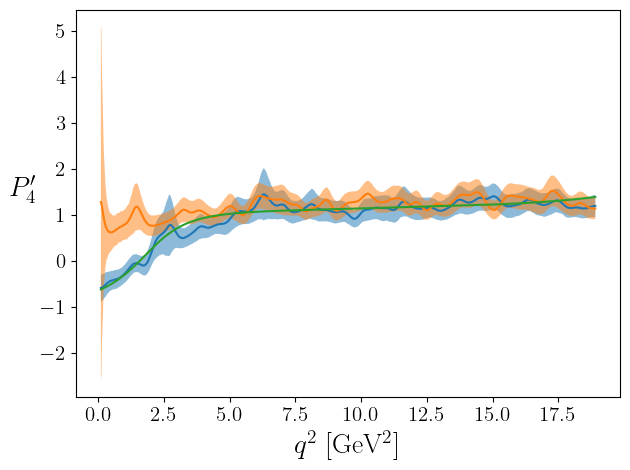

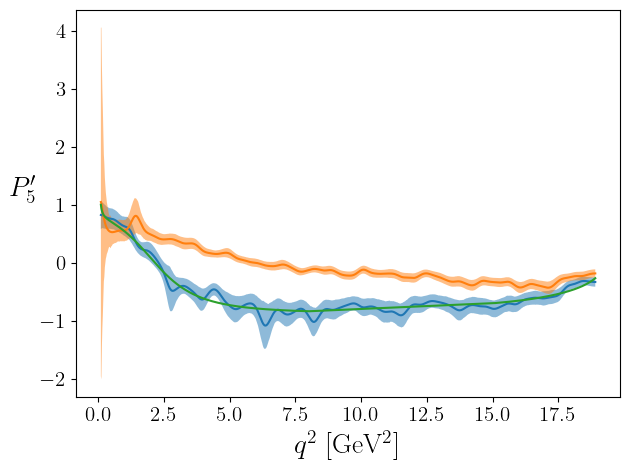

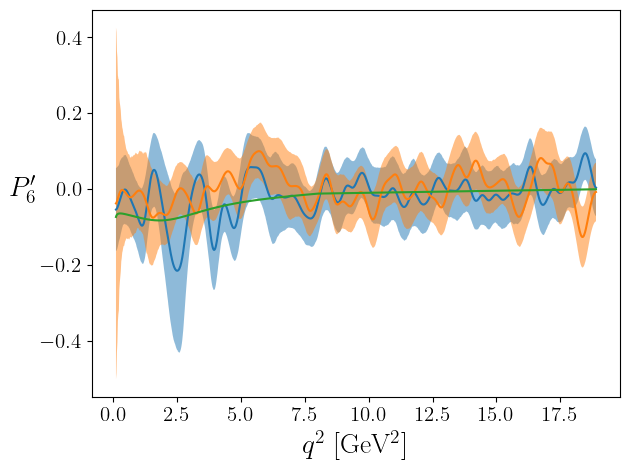

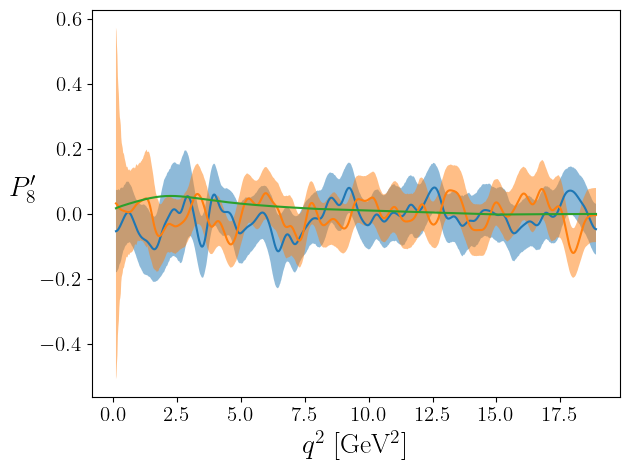

In [20]:
predValsOpt = {}
_i = 0
for _o in optObsList:
        pred, conversion = mypdf_SM.getPredictions(_o)
        predValsOpt[_o] = conversion*pred(q2vals)

# Plot the Pi basis with uncertainties from bootstrapping
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        if _i == len(optObsList):
            break
        _obs = optObsList[_i]
        while _obs in ['M1s', 'M1c', 'M2s', 'M2c', 'FL']:
            _i += 1
            if _i == len(optObsList):
                break
            _obs = optObsList[_i]
        _col.plot(T, unbins_SM[-1][_obs])
        #_col.fill_between(T.reshape(nq2), gaussian_filter1d(lower_vals[_obs], sigma=smear_power), gaussian_filter1d(upper_vals[_obs], sigma=smear_power), alpha = 0.5)
        _col.fill_between(T.reshape(nq2), unbins_SM[-1][_obs] - np.sqrt(unbins_SM[-1][f'var_{_obs}']/(n_neighbours-1)),
                                           unbins_SM[-1][_obs] + np.sqrt(unbins_SM[-1][f'var_{_obs}']/(n_neighbours - 1)), alpha = 0.5)
        if _obs == 'AFB':
            _col.plot(q2vals, 0.75*predValsOpt["S6s"])
        elif _obs not in ["S6c"]:
            _col.plot(q2vals, predValsOpt[_obs])
        #_col.axvline(1.020**2, color="green", linestyle="dotted")
        #_col.axvline(1.1, color="green", linestyle="dotted")
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[_obs], rotation=0)
        pred_SM, conversion_SM = mypdf_SM.getPredictions(optObsList[_i])
        predVals_SM[optObsList[_i]] = conversion_SM*pred_SM(q2vals)
        pred_NP1, conversion_NP1 = mypdf_NP1.getPredictions(optObsList[_i])
        predVals_NP1[optObsList[_i]] = conversion_NP1*pred_NP1(q2vals)
        
        _i += 1
pp = PdfPages('pi_observables.pdf')
for _o in optObsList:
    plt.figure()
    plt.plot(T, unbins_SM[-1][_o])
    plt.fill_between(T.reshape(nq2), unbins_SM[-1][_o] - np.sqrt(unbins_SM[-1][f'var_{_o}']/(n_neighbours-1)),
                                     unbins_SM[-1][_o] + np.sqrt(unbins_SM[-1][f'var_{_o}']/(n_neighbours - 1)), alpha = 0.5)
    plt.plot(T, unbins_NP1[-1][_o])
    plt.fill_between(T.reshape(nq2), unbins_NP1[-1][_o] - np.sqrt(unbins_NP1[-1][f'var_{_o}']/(n_neighbours-1)),
                                     unbins_NP1[-1][_o] + np.sqrt(unbins_NP1[-1][f'var_{_o}']/(n_neighbours - 1)), alpha = 0.5)
    if _o == 'AFB':
        plt.plot(q2vals, 0.75*predValsOpt["S6s"])
    elif _o not in ["S6c"]:
        plt.plot(q2vals, predValsOpt[_o])
    elif _o == "S6c":
        plt.axhline(0, color='orange')
        #_col.axvline(1.020**2, color="green", linestyle="dotted")
        #_col.axvline(1.1, color="green", linestyle="dotted")
    plt.xlabel("$q^{2}$ [GeV$^{2}$]", rotation = 0, fontsize = 20)
    plt.ylabel(obs_to_label[_o], rotation = 0, fontsize = 20, labelpad = 12)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    pp.savefig()
pp.close()

3.5636111778013135
P2 zero crossing point = $3.703 ^{+3.820}_{-3.564}$


ValueError: A value (0.0) in x_new is above the interpolation range's maximum value (-0.00614120672628872).

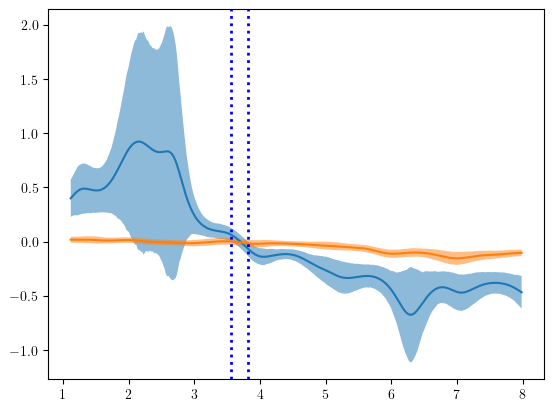

In [21]:
# 0 crossing in P2:
pp_zero = PdfPages("zero_crossing.pdf")
q2_cut_range = '(q2vals<8.) & (q2vals>1.1)'
for _o in ["P2", "P5p"]:
    p2_central = interp1d(unbins_SM[-1][_o], T.reshape(nq2))
    p2_lower = interp1d(unbins_SM[-1][_o] - np.sqrt(unbins_SM[-1][f'var_{_o}']/(n_neighbours-1)), T.reshape(nq2))
    p2_upper = interp1d(unbins_SM[-1][_o] + np.sqrt(unbins_SM[-1][f'var_{_o}']/(n_neighbours-1)), T.reshape(nq2))

    p2_lower_NP1 = interp1d(unbins_NP1 [-1][_o] - np.sqrt(unbins_NP1 [-1][f'var_{_o}']/(n_neighbours-1)), T.reshape(nq2))
    p2_upper_NP1 = interp1d(unbins_NP1 [-1][_o] + np.sqrt(unbins_NP1 [-1][f'var_{_o}']/(n_neighbours-1)), T.reshape(nq2))

    print(p2_lower(0.))
    print(r"%s zero crossing point = $%.3f ^{+%.3f}_{-%.3f}$" % (_o, p2_central(0.), p2_upper(0.), p2_lower(0.)))
    plt.figure()
    plt.plot(q2vals[eval(q2_cut_range)], unbins_SM[-1][_o][eval(q2_cut_range)], label = "SM")
    plt.fill_between(q2vals[eval(q2_cut_range)], unbins_SM[-1][_o][eval(q2_cut_range)] - np.sqrt(unbins_SM[-1][f'var_{_o}'][eval(q2_cut_range)]/(n_neighbours-1)),
                                 unbins_SM[-1][_o][eval(q2_cut_range)] + np.sqrt(unbins_SM[-1][f'var_{_o}'][eval(q2_cut_range)]/(n_neighbours - 1)), alpha = 0.5)

    plt.plot(q2vals[eval(q2_cut_range)], unbins_NP1[-1][_o][eval(q2_cut_range)], label = "NP1")
    plt.fill_between(q2vals[eval(q2_cut_range)], unbins_NP1[-1][_o][eval(q2_cut_range)] - np.sqrt(unbins_NP1[-1][f'var_{_o}'][eval(q2_cut_range)]/(n_neighbours-1)),
                                 unbins_NP1[-1][_o][eval(q2_cut_range)] + np.sqrt(unbins_NP1[-1][f'var_{_o}'][eval(q2_cut_range)]/(n_neighbours - 1)), alpha = 0.5)

#plt.axvline(p2_central(0), color = "r")
    plt.axvline(p2_lower(0), color = "b", linestyle="dotted", linewidth = 2)
    plt.axvline(p2_upper(0), color = "b", linestyle="dotted", linewidth = 2)
    plt.axvline(p2_lower_NP1(0), color = "orange", linestyle="dotted", linewidth = 2)
    plt.axvline(p2_upper_NP1(0), color = "orange", linestyle="dotted", linewidth = 2)
    plt.axhline(0, color = "black", linewidth = 0.5)
    plt.xlabel("$q^{2}$ [GeV$^{2}$]", rotation = 0, fontsize = 20)
    plt.ylabel(obs_to_label[_o], rotation = 0, fontsize = 20, labelpad = 12)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.legend(frameon = False, fontsize = 15)
    plt.tight_layout()
    pp_zero.savefig()
pp_zero.close()

In [22]:
# Some ratios for Quim
importlib.reload(moments)
predVals_SM = moments.calculateQuimObs(predVals_SM, T.reshape(nq2), False)
predVals_NP1 = moments.calculateQuimObs(predVals_NP1, T.reshape(nq2), False)

/home/mark/Documents/unbinned_kstmumu/moments.py:195: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(4.*inframe['P2']**2 - 8.*inframe['P2']*inframe['P4p']*inframe['P5p'] + inframe['P5p']**2)
/home/mark/Documents/unbinned_kstmumu/moments.py:204: RuntimeWarning: invalid value encountered in sqrt
  D = 1./np.sqrt(-2.*inframe["P2"]*inframe["P4p"] + inframe["P5p"] + z)
/home/mark/Documents/unbinned_kstmumu/moments.py:203: RuntimeWarning: invalid value encountered in sqrt
  B = np.sqrt(2*inframe["P2"]*inframe["P4p"] + inframe["P5p"] - 2.*inframe["P4p"]**2 * inframe["P5p"] + z)


In [23]:
#importlib.reload(moments)
unbins_SM[-1] = moments.calculateQuimObs(unbins_SM[-1], T.reshape(nq2))
unbins_NP1[-1] = moments.calculateQuimObs(unbins_NP1[-1], T.reshape(nq2))
unbins_NP2[-1] = moments.calculateQuimObs(unbins_NP2[-1], T.reshape(nq2))

/home/mark/my_python/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mark/my_python/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mark/my_python/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
mb = 4.8
mB = 5.279
mbh = 4.8/5.279
mB2 = mB**2
q2arr = T.reshape(nq2)
sh = q2arr/mB2
mean_vals["ff"] = []
mean_vals["C9_C7"] = []
lower_vals["ff"] = []
lower_vals["C9_C7"] = []
upper_vals["ff"] = []
upper_vals["C9_C7"] = []
sigma_vals["ff"] = []
sigma_vals["C9_C7"] = []
A_B = 8.*(0.892**2 / mB2)*sh/((1. - sh)**2)
for _s in range(nvariants):
    for _o in optObsList:
        p_arr[_o] = np.array(unbins[_s][_o])
    p_arr["S2c"] = unbins[_s]["S2c"]
    z = np.sqrt(4.*p_arr['P2']**2 - 4.*p_arr['P2']*p_arr['P4p']*p_arr['P5p'] + p_arr['P5p']**2)
    c9_c7_ratio = -(mbh)*(1 + (p_arr['P5p']*(sh - 1.))/(z) + sh )
    c9_c7_ratio /= sh
    
    ff_ratio = np.sqrt((-p_arr["S2c"]/(1.+p_arr["S2c"])) * A_B * ((p_arr["P5p"] + z)**2/(p_arr["P2"]**2)))
    ff_ratio *= (1./np.sqrt(2))
    unbins[_s]["ff"] = ff_ratio
    unbins[_s]["C9_C7"] = c9_c7_ratio
        
    
for _v in range(nq2):
    for _o in ["ff", "C9_C7"]:     
        ordered = [unbins[_s][_o][_v] for _s in range(nvariants)]
        ordered.sort()
        mean_vals[_o].append(np.mean(ordered))
        lower_vals[_o].append(ordered[32])
        upper_vals[_o].append(ordered[168])
        sigma_vals[_o].append(0.5*abs(upper_vals[_o][-1] - lower_vals[_o][-1]))

NameError: name 'mean_vals' is not defined

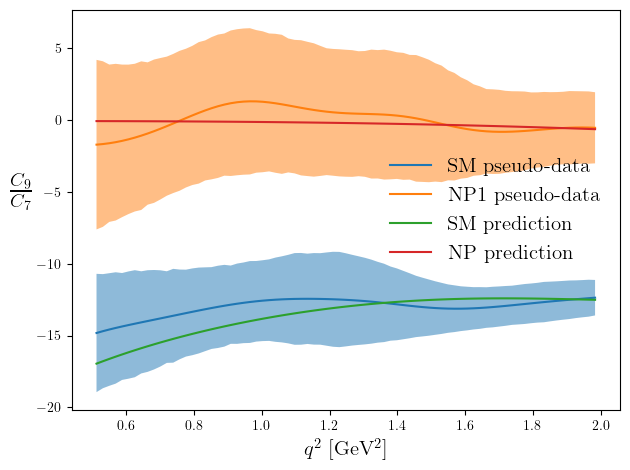

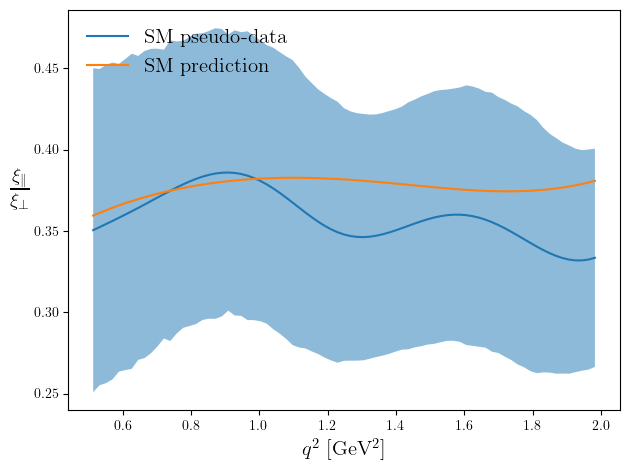

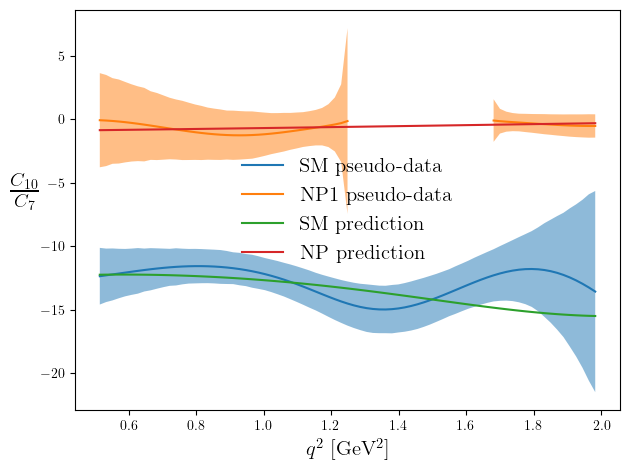

In [25]:
q2_cut_range = '(q2vals<2.) & (q2vals>0.5)'
plt.figure()
plt.plot(q2vals[eval(q2_cut_range)], unbins_SM[-1]["C9_C7"][eval(q2_cut_range)], label = 'SM pseudo-data')
plt.fill_between(q2vals[eval(q2_cut_range)], unbins_SM[-1]["C9_C7"][eval(q2_cut_range)] - np.sqrt(unbins_SM[-1]["var_C9_C7_C9_C7"][eval(q2_cut_range)]/(n_neighbours-1)),
                                             unbins_SM[-1]["C9_C7"][eval(q2_cut_range)] + np.sqrt(unbins_SM[-1]["var_C9_C7_C9_C7"][eval(q2_cut_range)]/(n_neighbours-1)),
                alpha = 0.5)

plt.plot(q2vals[eval(q2_cut_range)], unbins_NP1[-1]["C9_C7"][eval(q2_cut_range)], label = 'NP1 pseudo-data')
plt.fill_between(q2vals[eval(q2_cut_range)], unbins_NP1[-1]["C9_C7"][eval(q2_cut_range)] - np.sqrt(unbins_NP1[-1]["var_C9_C7_C9_C7"][eval(q2_cut_range)]/(n_neighbours-1)),
                                             unbins_NP1[-1]["C9_C7"][eval(q2_cut_range)] + np.sqrt(unbins_NP1[-1]["var_C9_C7_C9_C7"][eval(q2_cut_range)]/(n_neighbours-1)),
                alpha = 0.5)

#plt.fill_between(T.reshape(nq2), gaussian_filter1d(lower_vals["C9_C7"], sigma=4), gaussian_filter1d(upper_vals["C9_C7"], sigma=4), alpha = 0.5)
plt.plot(q2vals[eval(q2_cut_range)], predVals_SM["C9_C7"][eval(q2_cut_range)], label = 'SM prediction')
plt.plot(q2vals[eval(q2_cut_range)], predVals_NP1["C9_C7"][eval(q2_cut_range)], label = 'NP prediction')
plt.xlabel("$q^{2}$ [GeV$^{2}$]", fontsize = 15)
#plt.ylabel("$C_{9}/C_{7}$")
plt.ylabel(r"$\frac{C_{9}}{C_{7}}$", rotation = 0, fontsize = 20, labelpad = 12)
plt.legend(fontsize = 15, frameon = False)
plt.tight_layout()

plt.figure()
plt.plot(q2vals[eval(q2_cut_range)], unbins_SM[-1]["ff"][eval(q2_cut_range)], label = 'SM pseudo-data')
plt.fill_between(q2vals[eval(q2_cut_range)], unbins_SM[-1]["ff"][eval(q2_cut_range)] - np.sqrt(unbins_SM[-1]["var_ff_ff"][eval(q2_cut_range)]/(n_neighbours-1)),
                                             unbins_SM[-1]["ff"][eval(q2_cut_range)] + np.sqrt(unbins_SM[-1]["var_ff_ff"][eval(q2_cut_range)]/(n_neighbours-1)),
                 alpha = 0.5)

#plt.plot(q2vals[eval(q2_cut_range)], unbins_NP1[-1]["ff"][eval(q2_cut_range)], label = 'NP1 pseudo-data')
#plt.fill_between(q2vals[eval(q2_cut_range)], unbins_NP1[-1]["ff"][eval(q2_cut_range)] - np.sqrt(unbins_NP1[-1]["var_ff_ff"][eval(q2_cut_range)]/(n_neighbours-1)),
#                                             unbins_NP1[-1]["ff"][eval(q2_cut_range)] + np.sqrt(unbins_NP1[-1]["var_ff_ff"][eval(q2_cut_range)]/(n_neighbours-1)),
#                 alpha = 0.5)

#plt.fill_between(T.reshape(nq2), gaussian_filter1d(lower_vals["ff"], sigma=5), gaussian_filter1d(upper_vals["ff"], sigma=5), alpha = 0.5)
plt.plot(q2vals[eval(q2_cut_range)], predVals_SM["ff"][eval(q2_cut_range)], label = 'SM prediction')
plt.xlabel("$q^{2}$ [GeV$^{2}$]", fontsize = 15)
plt.ylabel(r"$\frac{\xi_\|}{\xi_\perp}$", rotation = 0, fontsize = 20, labelpad = 10)
plt.legend(loc = 'upper left', fontsize = 15, frameon = False)
plt.tight_layout()

plt.figure()
plt.plot(q2vals[eval(q2_cut_range)], unbins_SM[-1]["C10_C7"][eval(q2_cut_range)], label = 'SM pseudo-data')
plt.fill_between(q2vals[eval(q2_cut_range)], unbins_SM[-1]["C10_C7"][eval(q2_cut_range)] - np.sqrt(unbins_SM[-1]["var_C10_C7_C10_C7"][eval(q2_cut_range)]/(n_neighbours-1)),
                                             unbins_SM[-1]["C10_C7"][eval(q2_cut_range)] + np.sqrt(unbins_SM[-1]["var_C10_C7_C10_C7"][eval(q2_cut_range)]/(n_neighbours-1)),
                alpha = 0.5)

plt.plot(q2vals[eval(q2_cut_range)], unbins_NP1[-1]["C10_C7"][eval(q2_cut_range)], label = 'NP1 pseudo-data')
plt.fill_between(q2vals[eval(q2_cut_range)], unbins_NP1[-1]["C10_C7"][eval(q2_cut_range)] - np.sqrt(unbins_NP1[-1]["var_C10_C7_C10_C7"][eval(q2_cut_range)]/(n_neighbours-1)),
                                             unbins_NP1[-1]["C10_C7"][eval(q2_cut_range)] + np.sqrt(unbins_NP1[-1]["var_C10_C7_C10_C7"][eval(q2_cut_range)]/(n_neighbours-1)),
                alpha = 0.5)

#plt.fill_between(T.reshape(nq2), gaussian_filter1d(lower_vals["C9_C7"], sigma=4), gaussian_filter1d(upper_vals["C9_C7"], sigma=4), alpha = 0.5)
plt.plot(q2vals[eval(q2_cut_range)], predVals_SM["C10_C7"][eval(q2_cut_range)], label = 'SM prediction')
plt.plot(q2vals[eval(q2_cut_range)], predVals_NP1["C10_C7"][eval(q2_cut_range)], label = 'NP prediction')
plt.xlabel("$q^{2}$ [GeV$^{2}$]", fontsize = 15)
#plt.ylabel("$C_{9}/C_{7}$")
plt.ylabel(r"$\frac{C_{10}}{C_{7}}$", rotation = 0, fontsize = 20, labelpad = 12)
plt.legend(fontsize = 15, frameon = False)
plt.tight_layout()

In [77]:
n_neighbours = 4000
mkpirange = (0.75,1.1)
knn_2d = neighbors.KNeighborsRegressor(n_neighbours, weights="uniform", algorithm="kd_tree", n_jobs=8, leaf_size = 1000, p = 2)
T = np.linspace(q2range[0],q2range[1],nq2)[:, np.newaxis]
x = np.arange(q2range[0], q2range[1], 0.3)
y = np.arange(mkpirange[0], mkpirange[1], 0.01)
X,Y = np.meshgrid(x,y)
XY=np.array([X.flatten(),Y.flatten()]).T
unbins_2d = {}

In [78]:
tsample = evts_SM.sample(datasize, replace = True)
reshaped_q2 = np.array(tsample[['q2','mkpi']]).reshape(datasize,2)
twod_results = {}
for _obs in obsList:
    obsample = tsample['%s' % _obs]
    tempFit = knn.fit(reshaped_q2, obsample)
    twod_results[_obs] = tempFit.predict(XY)
    

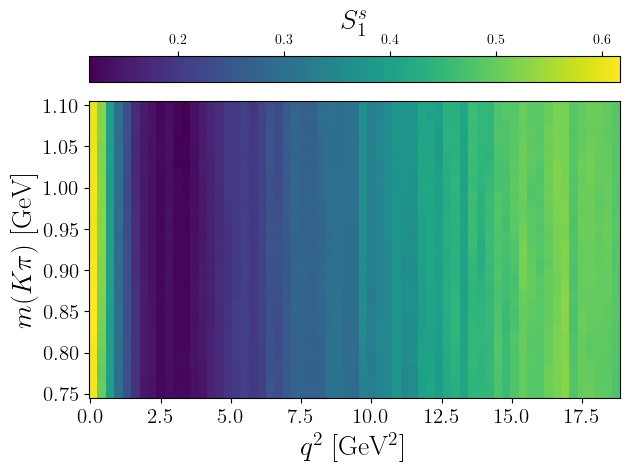

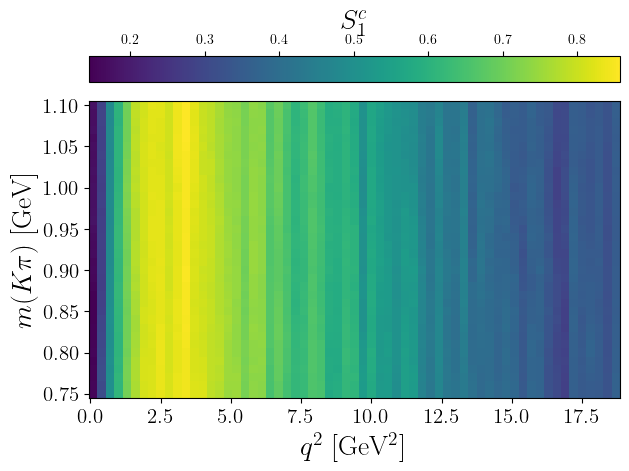

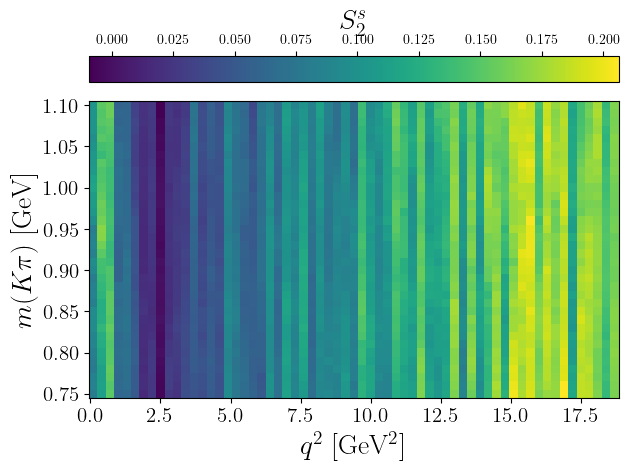

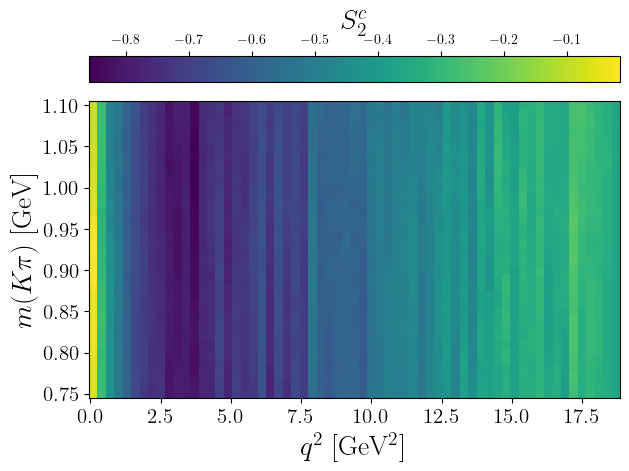

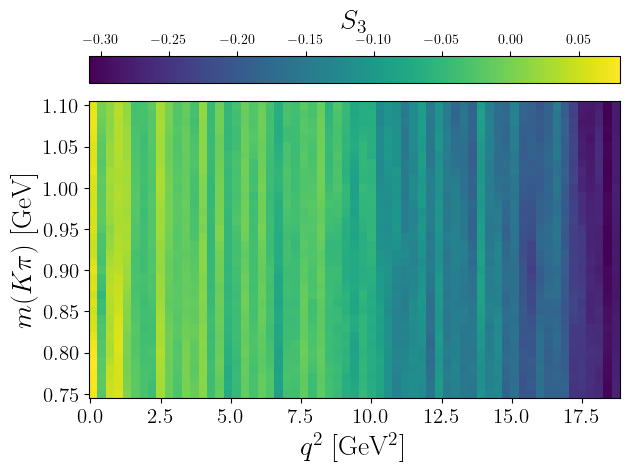

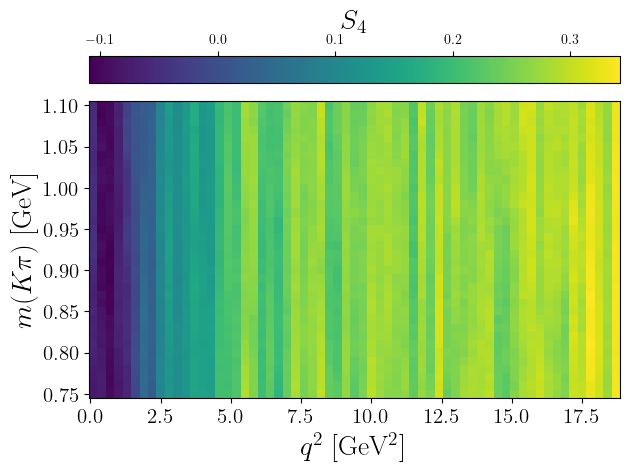

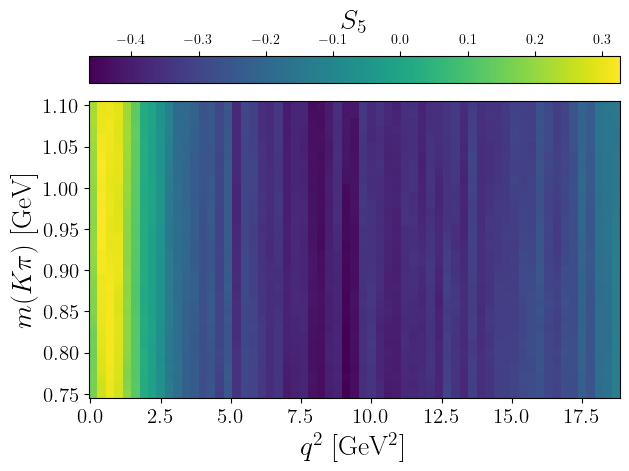

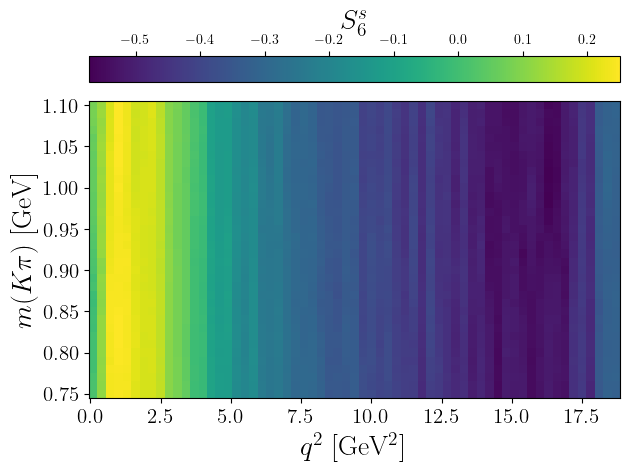

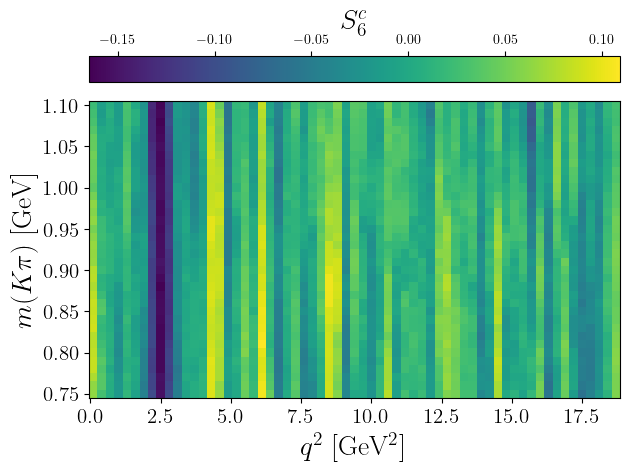

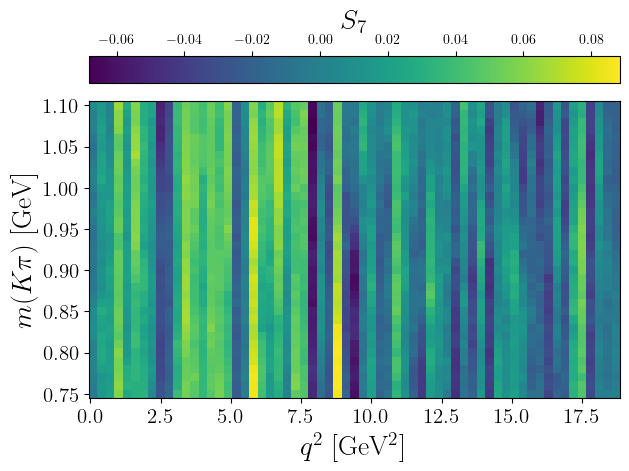

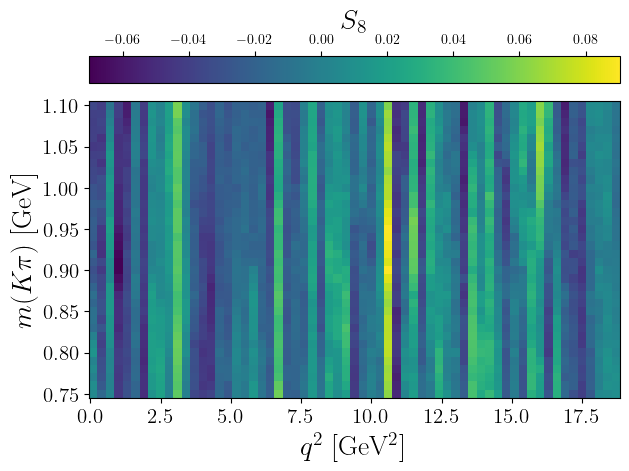

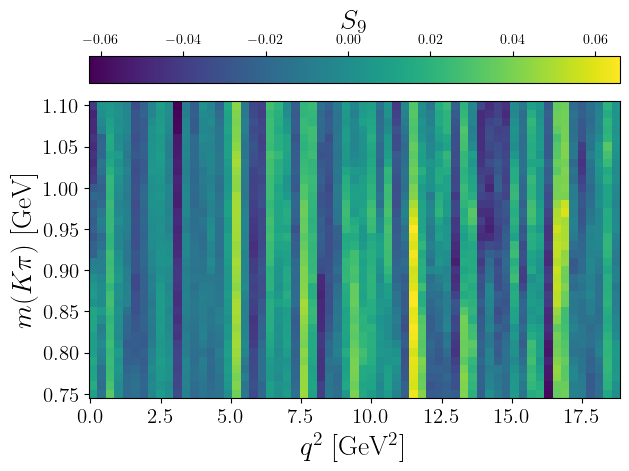

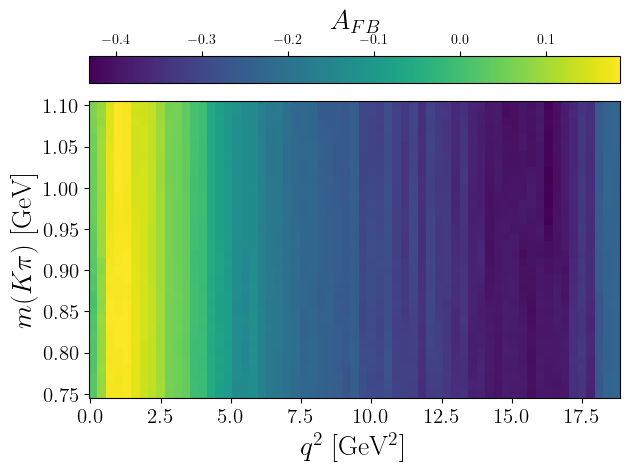

In [79]:
pp = PdfPages('2D_observables.pdf')
for _obs in obsList:
    if _obs == "FL":
        continue
    plt.figure()
    plt.pcolormesh(X[0], Y[:,1], twod_results[_obs].reshape(Y.shape))
    cbar = plt.colorbar(label  = obs_to_label[_obs], orientation = 'horizontal', location = 'top')
    cbar.set_label(obs_to_label[_obs], fontsize = 20)
    plt.xlabel('$q^{2}$ [GeV$^{2}$]', fontsize = 20)
    plt.ylabel('$m(K\pi)$ [GeV]', fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.tight_layout()
    pp.savefig()
pp.close()

In [93]:
# Make an estimate of the mean effective bin width
# Set up a BallTree to efficiently find nearest neighbours
from sklearn.neighbors import BallTree 
tree = BallTree(np.array(evts_SM["q2"]).reshape(-1,1), leaf_size=20)
# Get a list of neighbour indices from our vector of q2 values. This is for use in the variance calculations
def neighbour_range(indices):
    rs = evts_SM.iloc[indices[0]]
    trange = max(rs["q2"]) - min(rs["q2"])
    return trange
range_list = []
n_neighbours = 1000
for _q2 in np.linspace(0.06,19.0,100):
    dist, _ind = tree.query([[_q2]], k=n_neighbours)
    range_list.append(neighbour_range(_ind))
print("Mean width: %.4f" % np.mean(range_list))

Mean width: 0.1587


In [53]:
chi2_obs_list = [ 'S2c','S3', 'S4', 'S5', 'S6s','S7', 'S8', 'S9']

In [89]:
test_rows = unbins_SM[-1][::30]
chi2 = 0.
for _r in range(len(test_rows)):
    t1 = test_rows[chi2_obs_list].iloc[_r].to_numpy().transpose()
    t2 = test_rows[chi2_obs_list].iloc[_r].to_numpy()
    cov = np.zeros(shape = (8,8))
    _i = 0
    _j = 0
    for _i in range(8):
        _oi  = chi2_obs_list[_i]
        for _j in range(_i, 8):
            _oj = chi2_obs_list[_j]
            cov[_i, _j] = test_rows.iloc[_r][f"var_{_oi}_{_oj}"]
            cov[_j, _i] = test_rows.iloc[_r][f"var_{_oi}_{_oj}"]
    invcov = np.linalg.inv(cov)
    chi2 += np.matmul(t1, np.matmul(invcov,t2)) + np.sum(np.diagonal(cov))

In [94]:
cov

array([[ 2.95459423e+00, -2.12104882e-02,  1.34204973e-01,
         8.72794445e-02,  1.87869030e-01, -7.14809412e-03,
        -5.25367682e-02, -6.94961064e-02],
       [-2.12104882e-02,  1.22193171e+00,  1.70764412e-01,
        -1.11977688e-01, -1.94090286e-02,  2.80445141e-02,
         4.95731213e-02,  4.18530573e-02],
       [ 1.34204973e-01,  1.70764412e-01,  1.19571297e+00,
        -3.04697841e-01, -8.94340064e-02,  2.13621542e-02,
         3.93375097e-02,  5.77894176e-03],
       [ 8.72794445e-02, -1.11977688e-01, -3.04697841e-01,
         9.85183199e-01,  1.16149410e-01,  7.64550312e-02,
         2.13621542e-02,  2.84321480e-02],
       [ 1.87869030e-01, -1.94090286e-02, -8.94340064e-02,
         1.16149410e-01,  1.39430487e+00, -1.16909664e-03,
        -4.17726510e-02, -5.17073228e-02],
       [-7.14809412e-03,  2.80445141e-02,  2.13621542e-02,
         7.64550312e-02, -1.16909664e-03,  1.38888830e+00,
        -2.25948221e-01, -1.04771814e-01],
       [-5.25367682e-02,  4.957312

In [83]:
invcov

array([[ 0.47607048, -0.01163322, -0.0042205 ,  0.03059289,  0.03236273,
         0.01838285, -0.00651283, -0.01018843],
       [-0.01163322,  0.65917955,  0.02117072, -0.06027673, -0.02891206,
         0.0451337 , -0.01924146,  0.00120607],
       [-0.0042205 ,  0.02117072,  0.78182545, -0.08936529, -0.02688731,
         0.04312139, -0.00394434, -0.02758856],
       [ 0.03059289, -0.06027673, -0.08936529,  1.04639707,  0.02481871,
        -0.02397226,  0.03531934, -0.01769798],
       [ 0.03236273, -0.02891206, -0.02688731,  0.02481871,  0.58218745,
        -0.01744613, -0.0038981 , -0.00778598],
       [ 0.01838285,  0.0451337 ,  0.04312139, -0.02397226, -0.01744613,
         1.04027188,  0.01497085, -0.0987123 ],
       [-0.00651283, -0.01924146, -0.00394434,  0.03531934, -0.0038981 ,
         0.01497085,  0.76204303,  0.0201456 ],
       [-0.01018843,  0.00120607, -0.02758856, -0.01769798, -0.00778598,
        -0.0987123 ,  0.0201456 ,  0.65635273]])